In [1]:
import so
import gc

## Load the posting data

In [2]:
df = so.load_data()

In [3]:
so.did_prepare_data(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997763 entries, 0 to 5997762
Data columns (total 18 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PostTypeId        int64         
 1   AcceptedAnswerId  float64       
 2   CreationDate      datetime64[ns]
 3   Score             int64         
 4   ViewCount         float64       
 5   AnswerCount       float64       
 6   CommentCount      int64         
 7   FavoriteCount     float64       
 8   Title             object        
 9   Tags              object        
 10  line_count        float64       
 11  T                 int64         
 12  P                 int64         
 13  W                 int64         
 14  code              object        
 15  text              object        
 16  log_lc            float64       
 17  D                 int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(6), object(4)
memory usage: 800.8+ MB


In [5]:
df['CreationDate'].max()

Timestamp('2023-05-28 23:59:59.073000')

## Run the regressions

In [6]:
questions = so.questions(df)
answers = so.answers(df)

In [ ]:
dfs = {'questions': questions, 'answers': answers}
outcomes = {'questions': ['line_count', 'log_lc', 'ViewCount', 'Score'],
            'answers': ['line_count', 'log_lc', 'Score']}
start_dates = {}
masks = {}
results = {}

for type, df in dfs.items():
    print(f'Masks: {type}')
    start_dates[type], masks[type] = so.rolling_window_masks(df)    

for type, outcome_list in outcomes.items():
    for outcome in outcome_list:
        print(f'Processing: {type} - {outcome}')

        X, y = so.did_design_matrix(outcome, dfs[type])
        res = so.did_ols(X, y, masks[type], start_dates[type])
        results[(type, outcome)] = res

Masks: questions
Masks: answers
Processing: questions - line_count
Step 0
Step 50
Step 100
Step 150
Processing: questions - log_lc
Step 0
Step 50
Step 100
Step 150
Processing: questions - ViewCount
Step 0
Step 50
Step 100
Step 150
Processing: questions - Score
Step 0
Step 50
Step 100
Step 150
Processing: answers - line_count
Step 0
Step 50
Step 100
Step 150
Processing: answers - log_lc
Step 0
Step 50
Step 100
Step 150
Processing: answers - Score
Step 0
Step 50
Step 100
Step 150


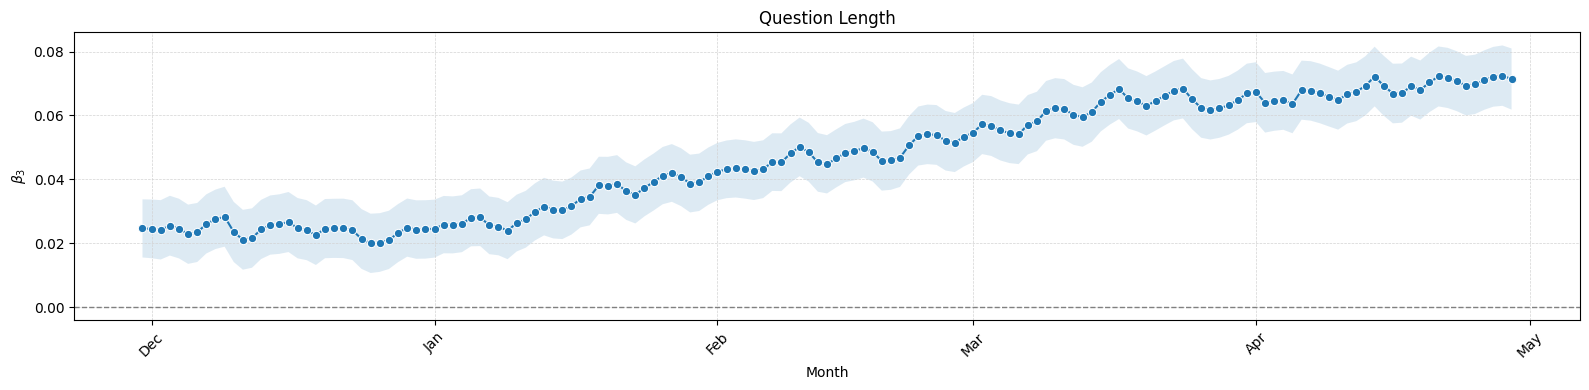

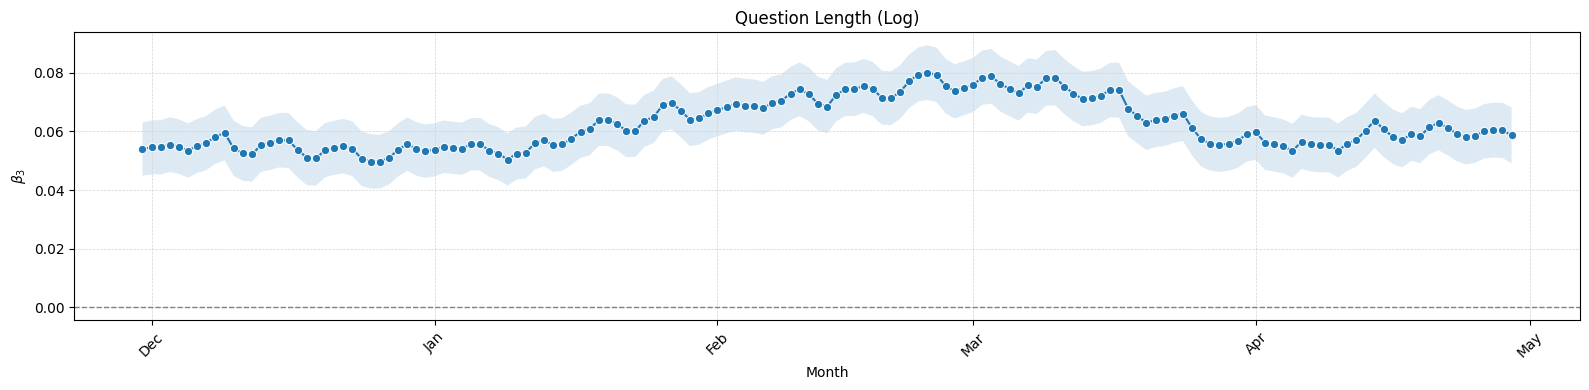

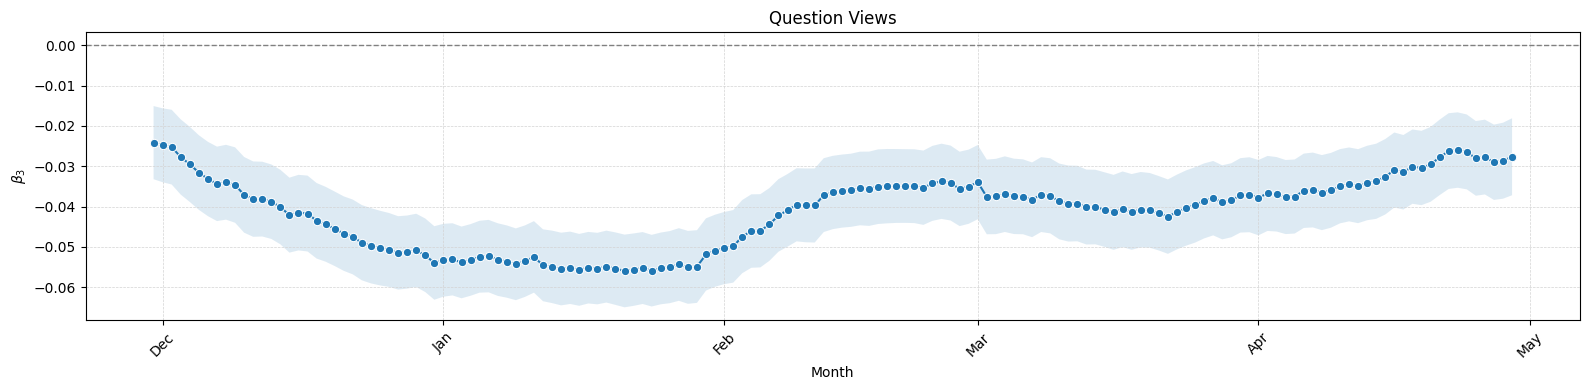

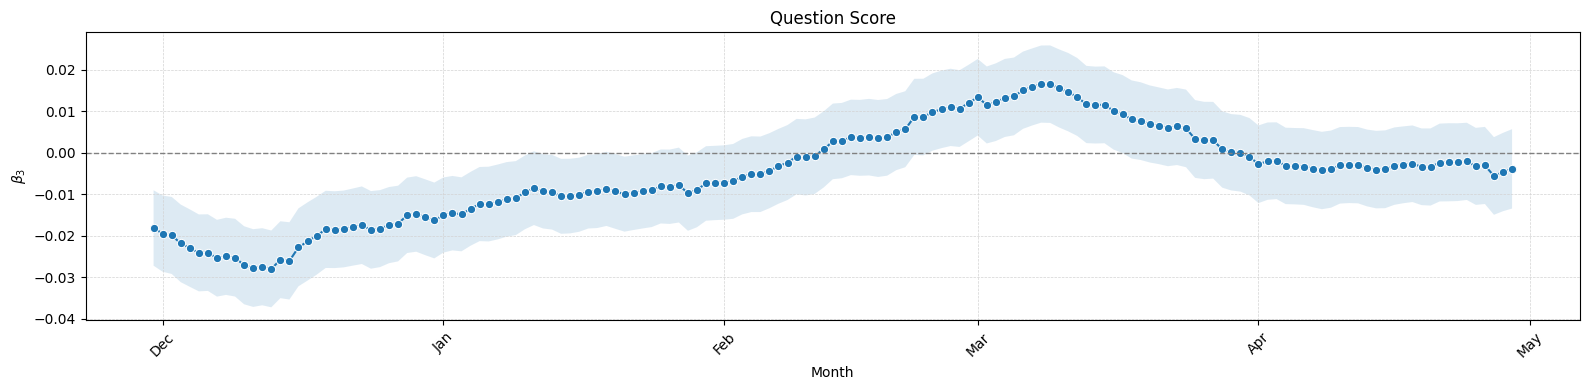

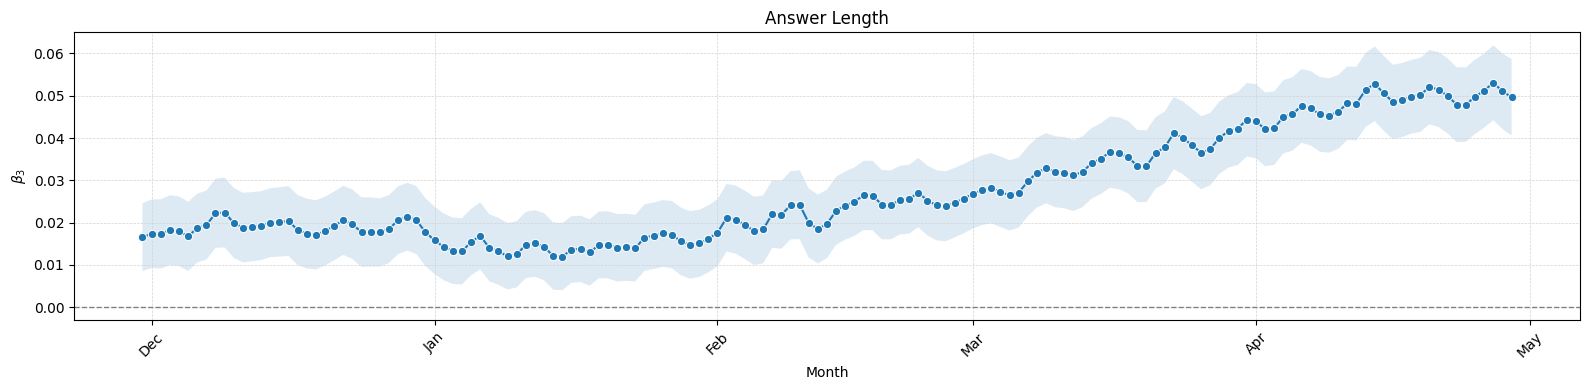

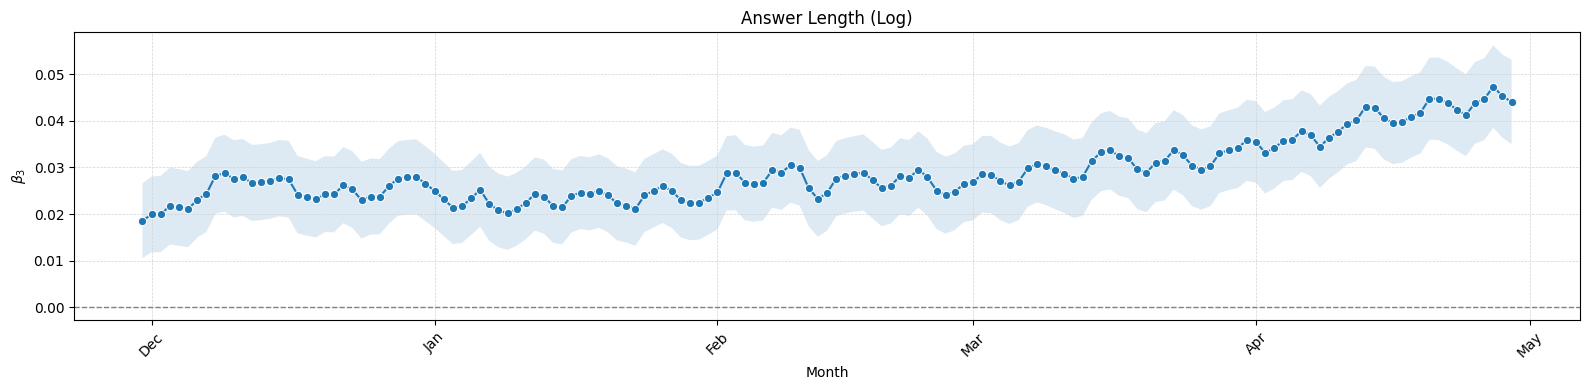

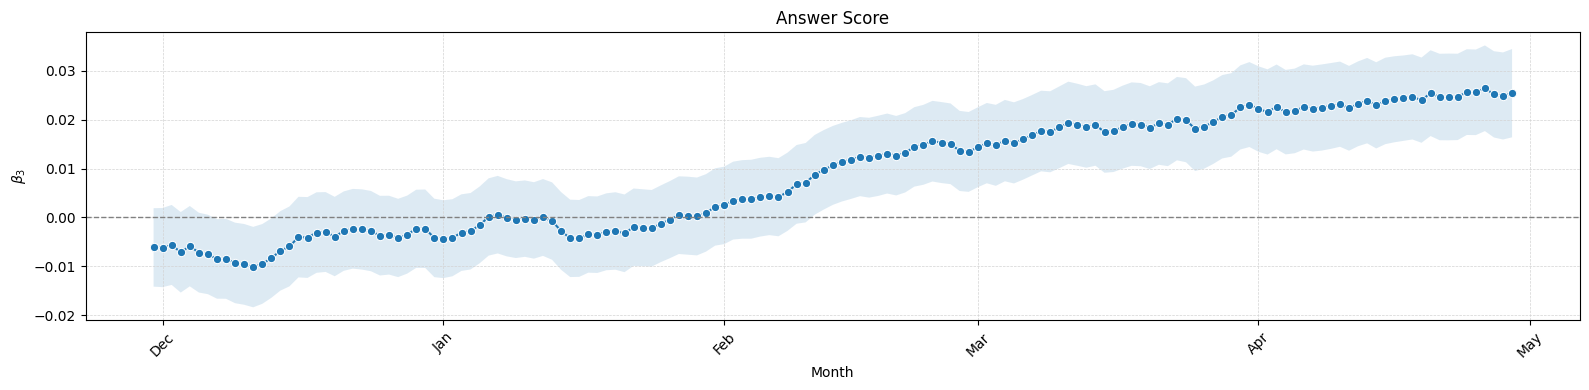

In [9]:
titles = {('questions', 'line_count'): ['Question Length', 'qlc_beta_1.pdf'],
           ('questions', 'log_lc'): ['Question Length (Log)', 'qllc_beta_1.pdf'],
           ('questions', 'ViewCount'): ['Question Views', 'qv_beta_1.pdf'],
           ('questions', 'Score'): ['Question Score', 'qs_beta_1.pdf'],
           ('answers', 'line_count'): ['Answer Length', 'alc_beta_1.pdf'],
           ('answers', 'log_lc'): ['Answer Length (Log)', 'allc_beta_1.pdf'],
           ('answers', 'Score'): ['Answer Score', 'as_beta_1.pdf']}

for key, df_res in results.items():
    so.plot_did(df_res, titles[key][0], titles[key][1])

### Free memory and run regression on the tag groups

In [10]:
del df
#del data
del questions
del answers
del dfs
del masks
gc.collect()

14039

## Run the regressions on the tag groups data

In [ ]:
filenames = ['android_c.csv', 'csharp_c.csv', 'java_c.csv', 'other_c.csv', 'python_c.csv', 'r_c.csv', 'web_c.csv']
tags = ['android', 'c#', 'java', 'other', 'python', 'r', 'web']

dfs = {}
for tag, filename in zip(tags, filenames):
    print(f'Loading: {tag}')
    df = so.load_data(filename=f'data/csv/tags/{filename}')
    so.did_prepare_data(df, 'tags')
    dfs[tag] = df

outcomes = ['line_count', 'log_lc', 'ViewCount', 'Score', 'loc', 'log_loc', 'Medium', 'Hard']
start_dates = {}
masks = {}
results = {}

for tag, df in dfs.items():
    print(f'Masks: {tag}')
    start_dates[tag], masks[tag] = so.rolling_window_masks(df)    

for tag in tags:
    for outcome in outcomes:
        print(f'Processing: {tag} - {outcome}')

        X, y = so.did_design_matrix(outcome, dfs[tag])
        res = so.did_ols(X, y, masks[tag], start_dates[tag])
        results[(tag, outcome)] = res

Loading: android
Loading: c#
Loading: java
Loading: other
Loading: python
Loading: r
Loading: web
Masks: android
Masks: c#
Masks: java
Masks: other
Masks: python
Masks: r
Masks: web
Processing: android - line_count
Step 0
Step 50
Step 100
Step 150
Processing: android - log_lc
Step 0
Step 50
Step 100
Step 150
Processing: android - ViewCount
Step 0
Step 50
Step 100
Step 150
Processing: android - Score
Step 0
Step 50
Step 100
Step 150
Processing: android - loc
Step 0
Step 50
Step 100
Step 150
Processing: android - log_loc
Step 0
Step 50
Step 100
Step 150
Processing: android - Medium
Step 0
Step 50
Step 100
Step 150
Processing: android - Hard
Step 0
Step 50
Step 100
Step 150
Processing: c# - line_count
Step 0
Step 50
Step 100
Step 150
Processing: c# - log_lc
Step 0
Step 50
Step 100
Step 150
Processing: c# - ViewCount
Step 0
Step 50
Step 100
Step 150
Processing: c# - Score
Step 0
Step 50
Step 100
Step 150
Processing: c# - loc
Step 0
Step 50
Step 100
Step 150
Processing: c# - log_loc
Step 0


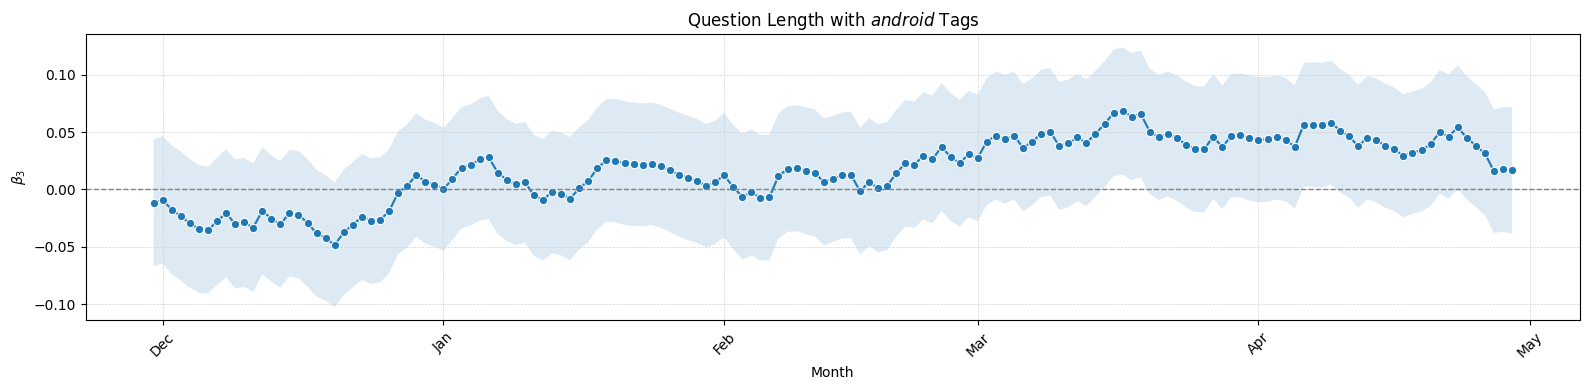

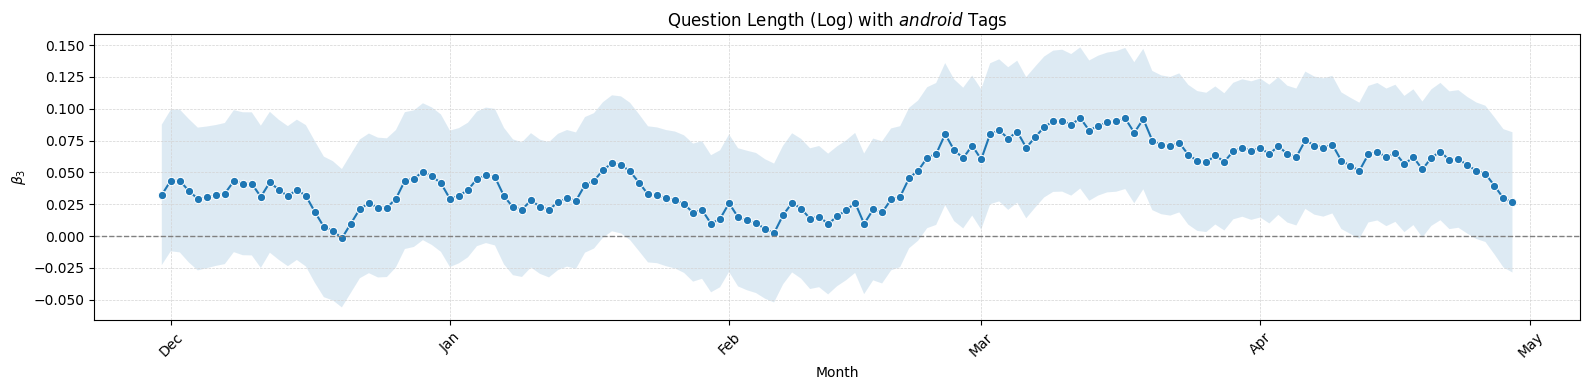

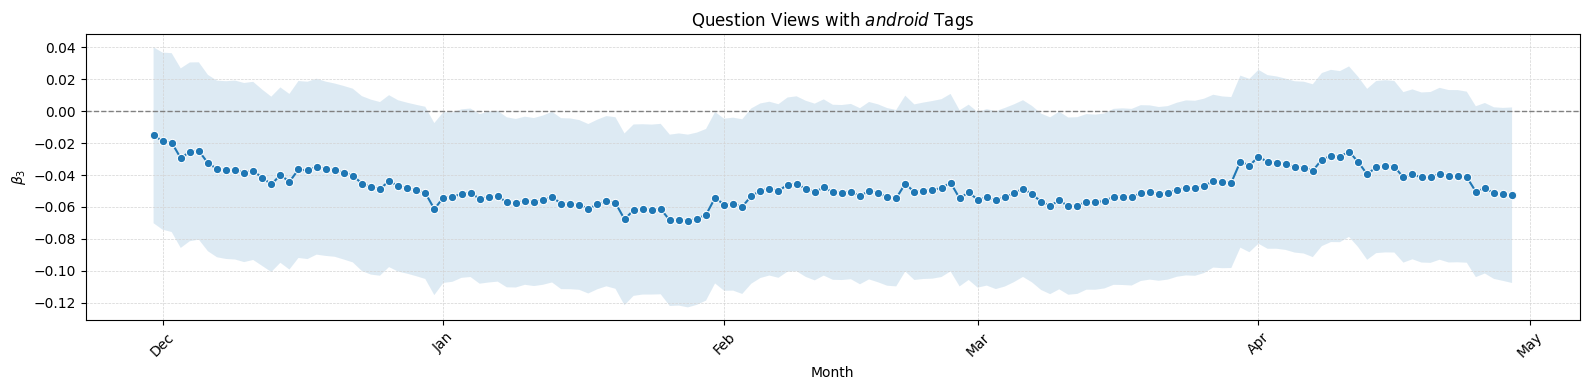

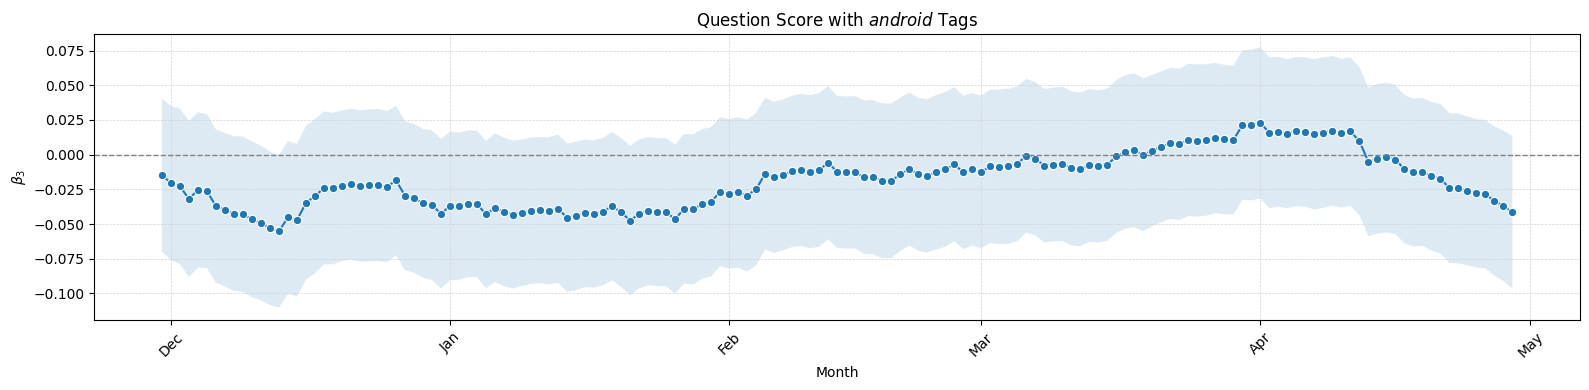

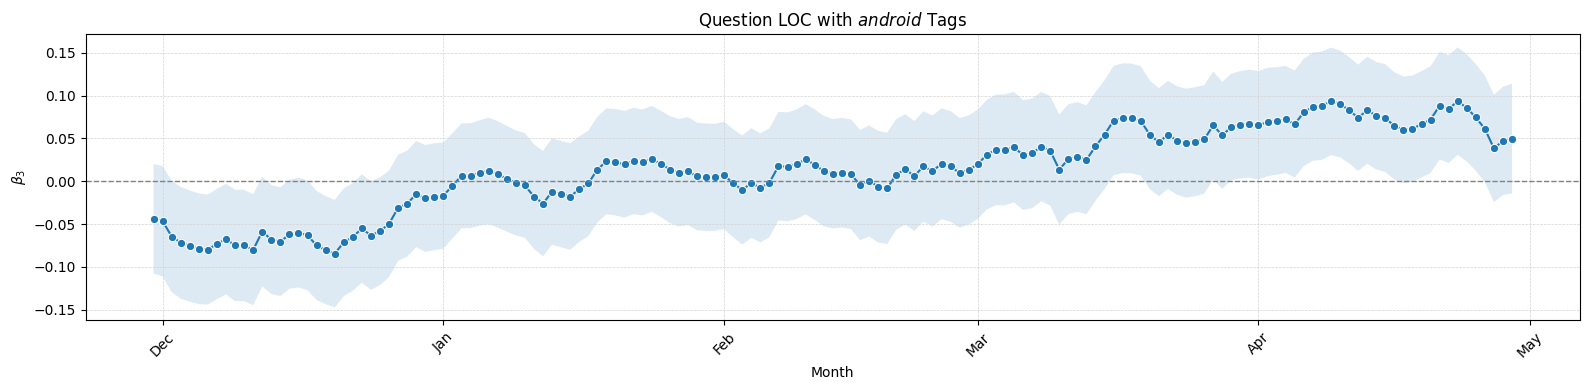

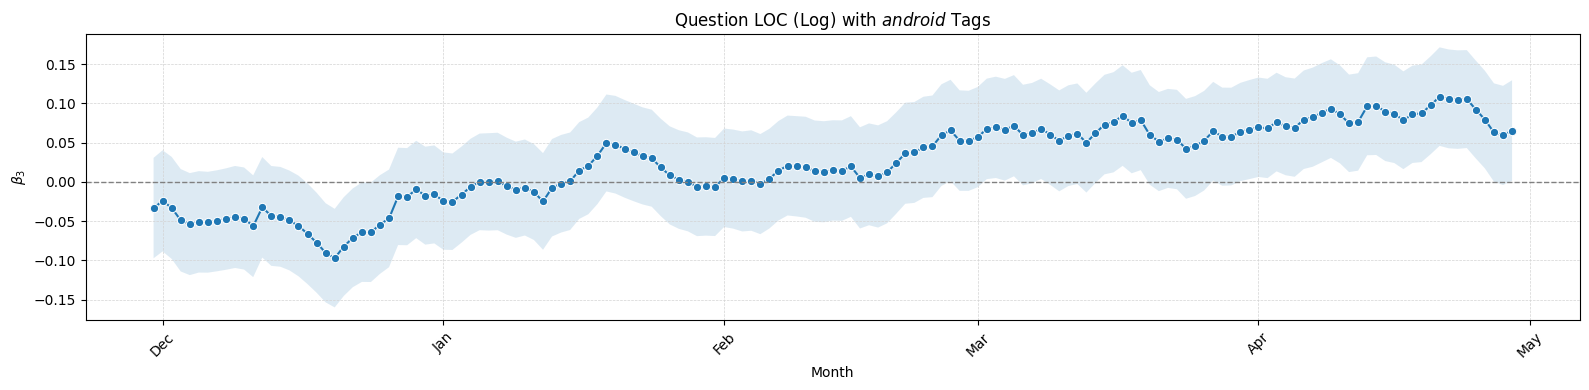

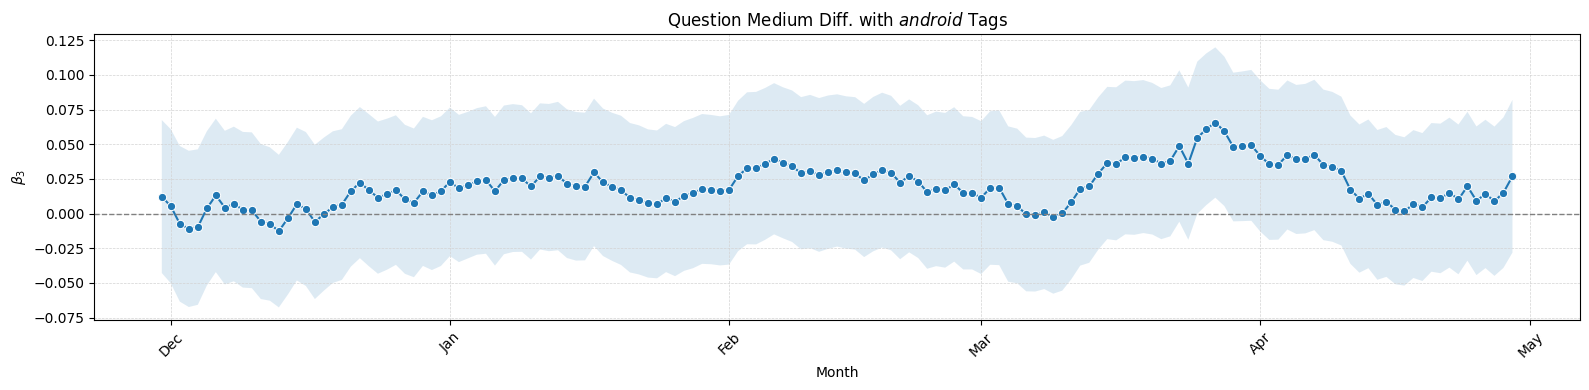

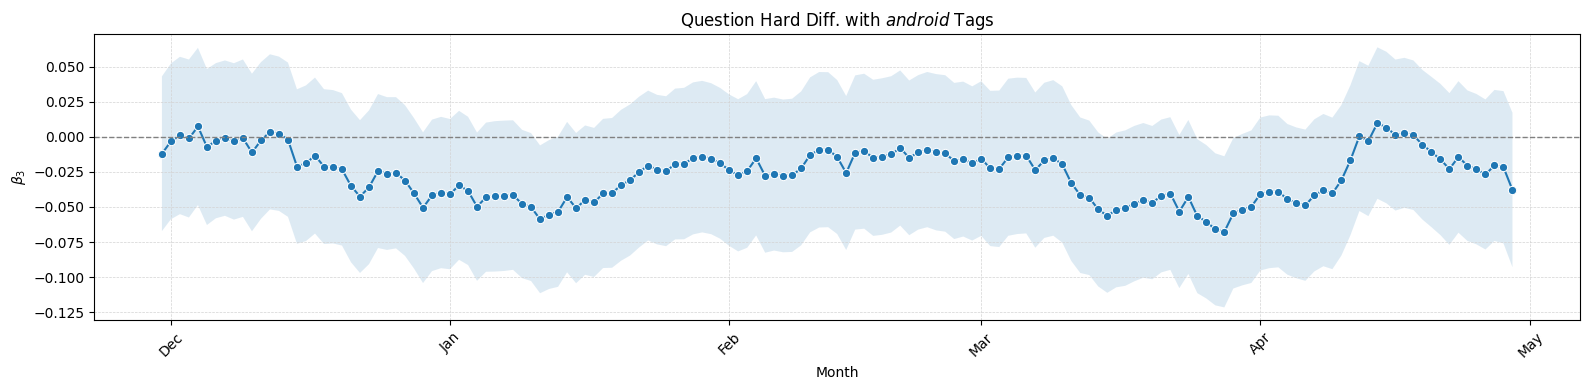

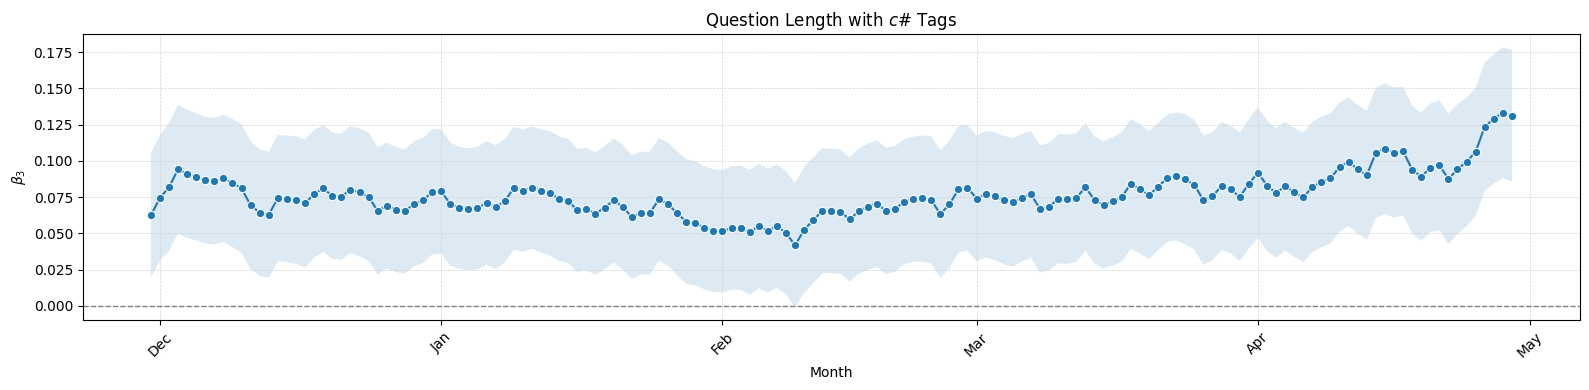

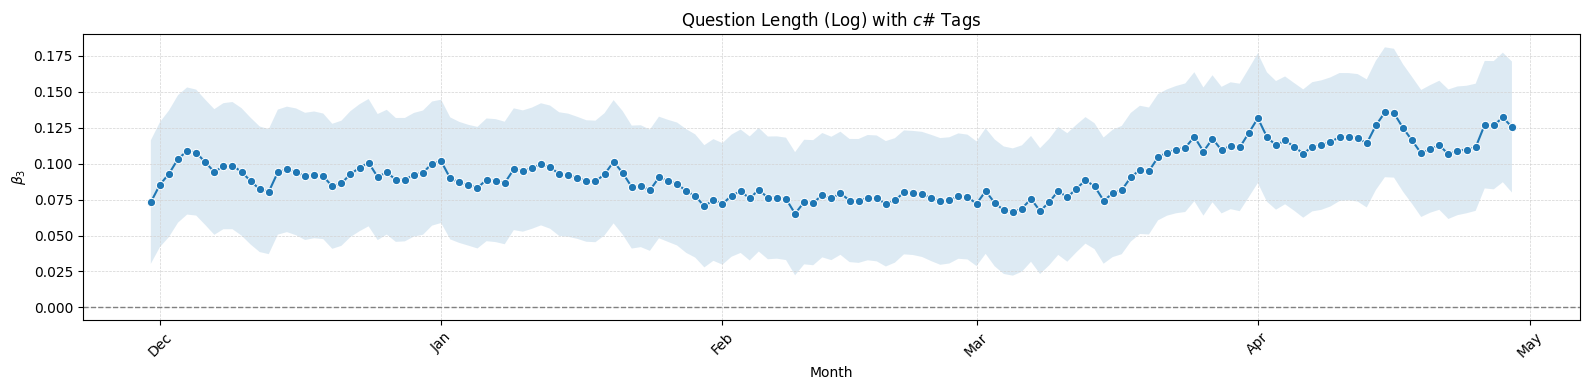

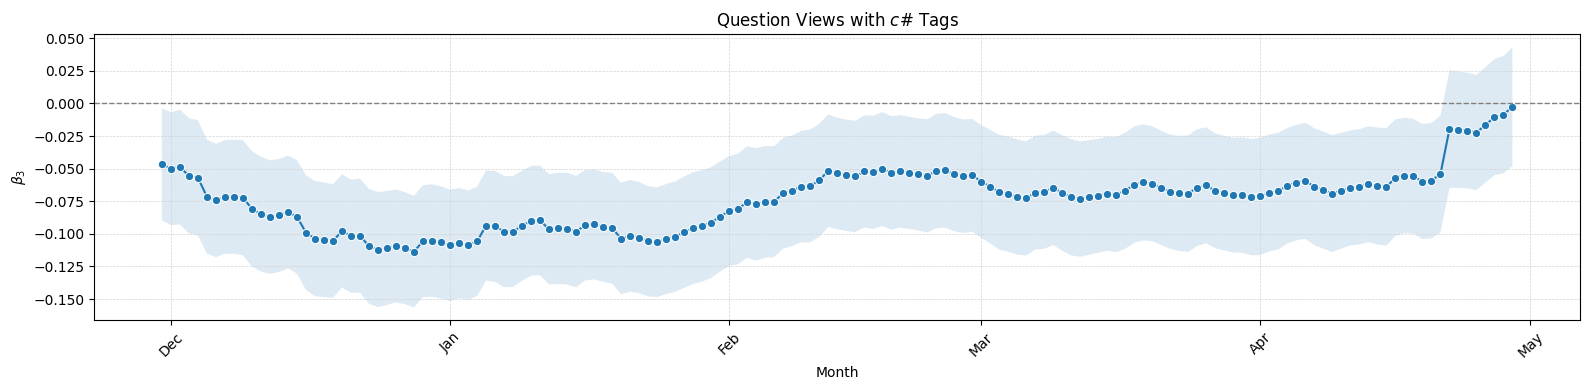

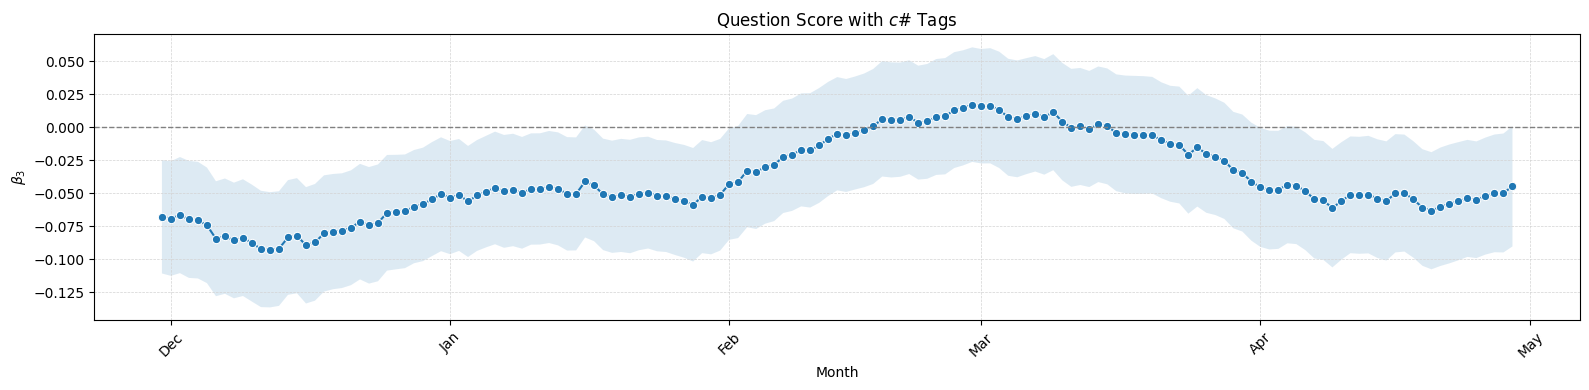

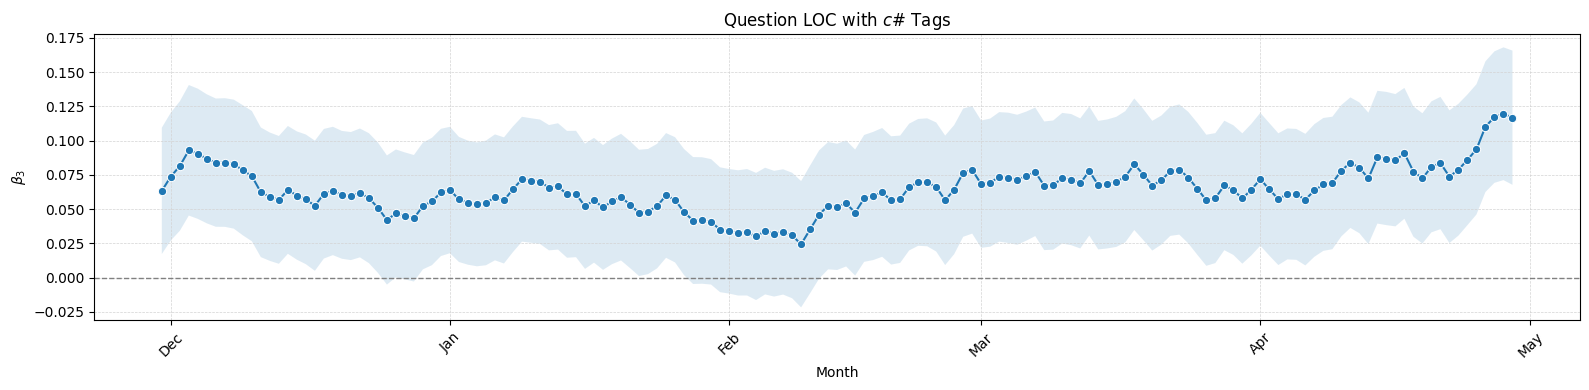

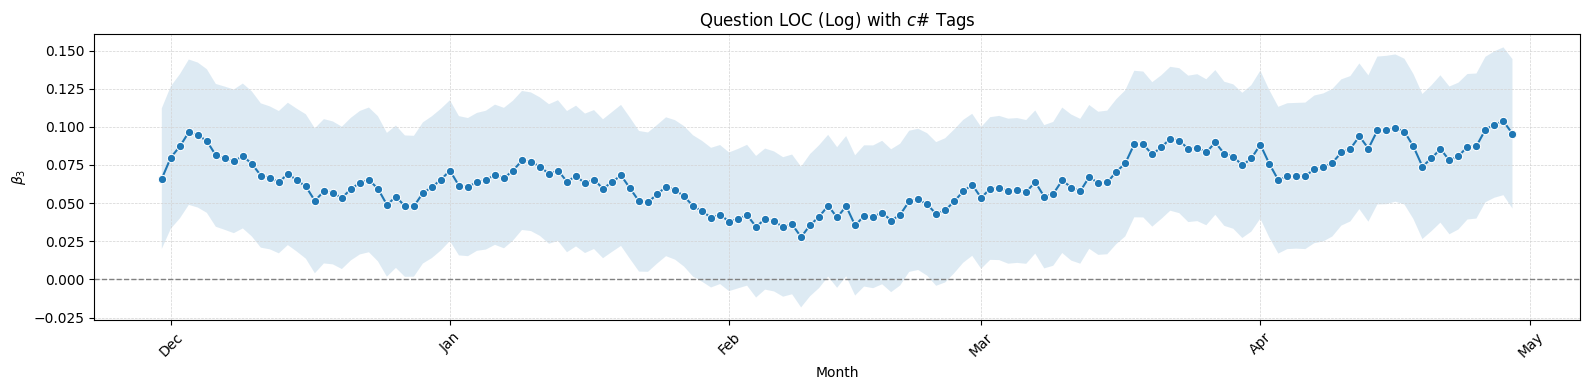

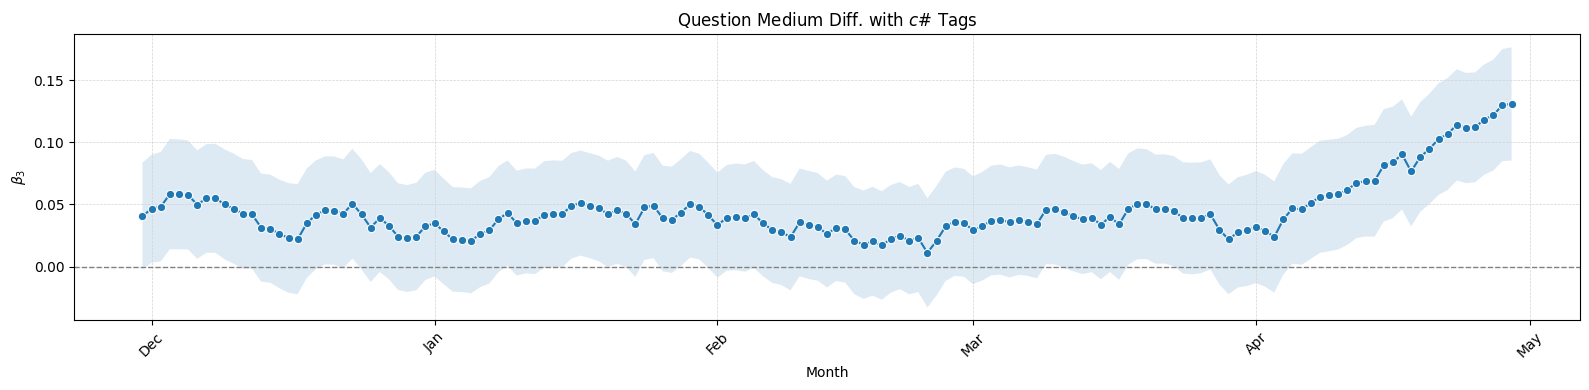

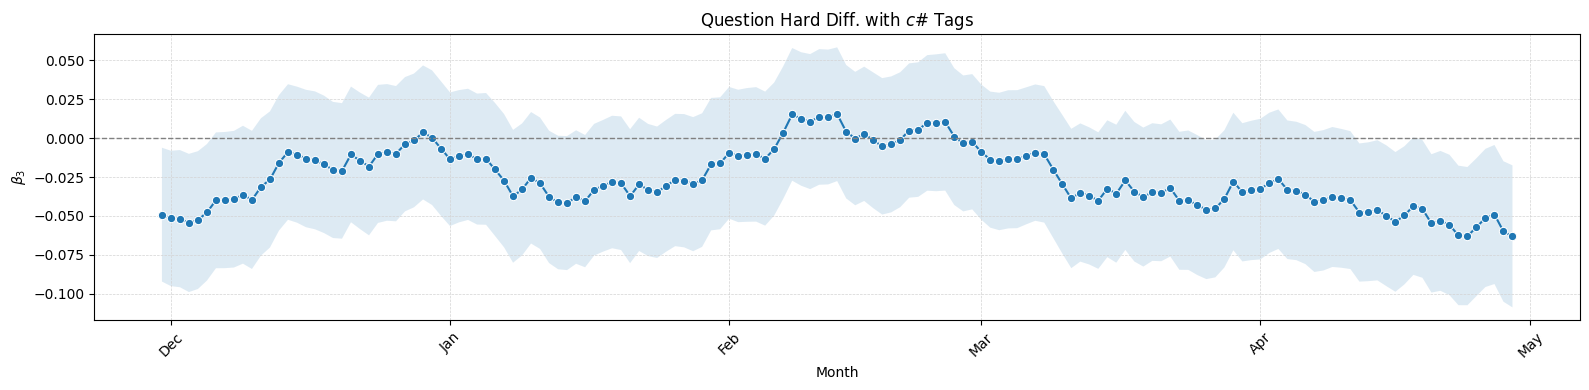

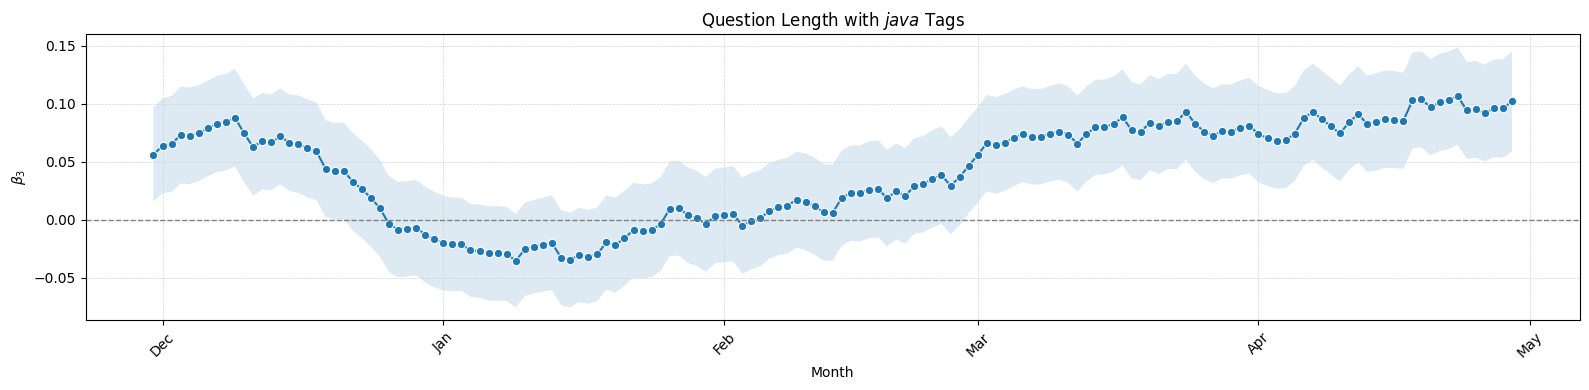

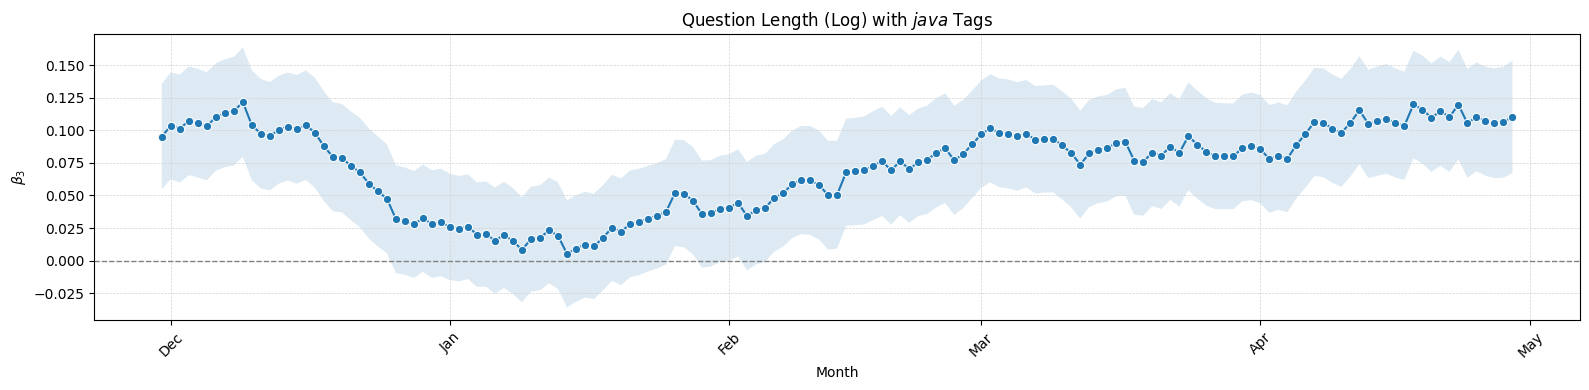

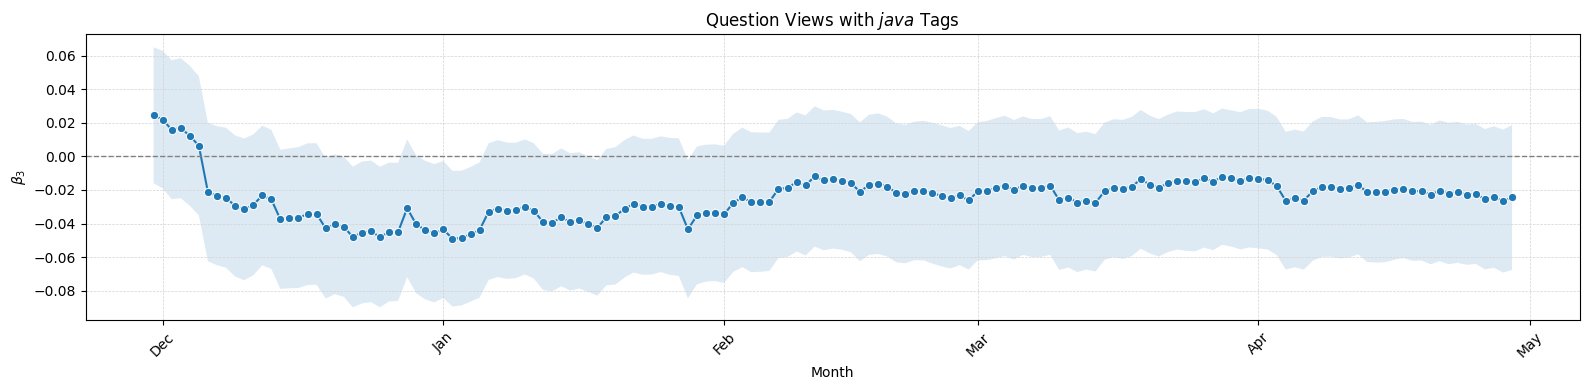

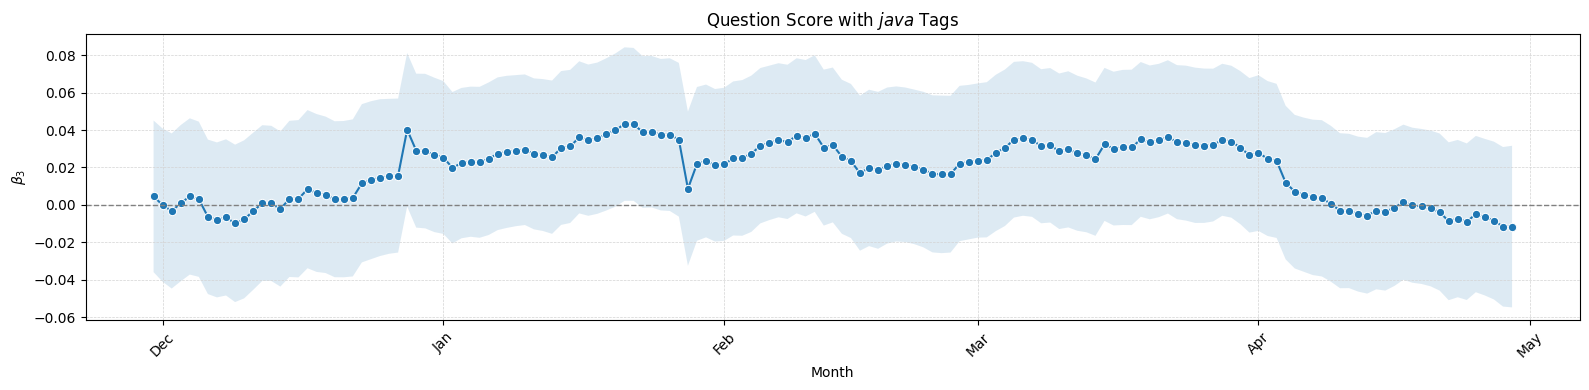

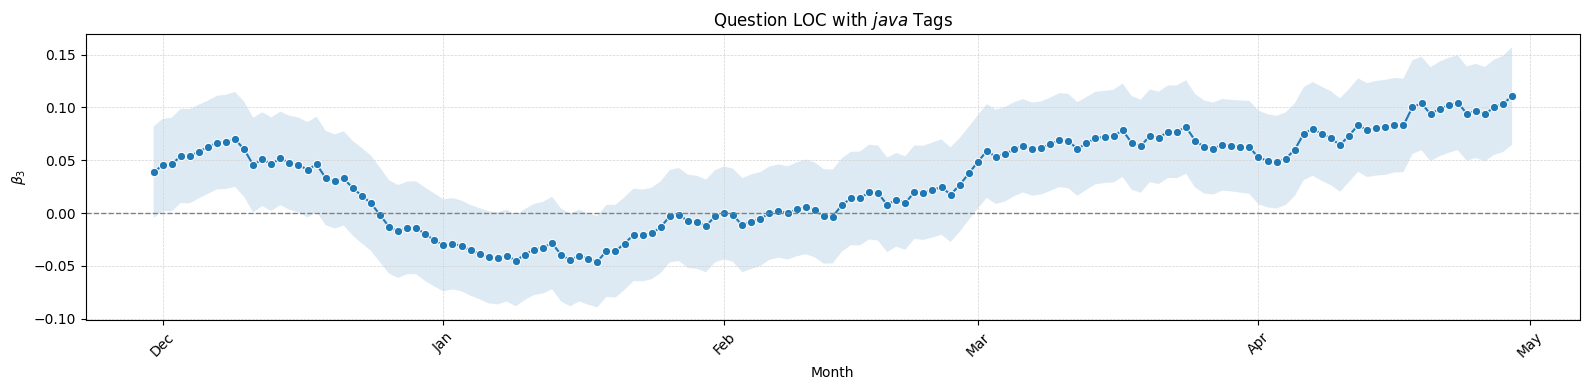

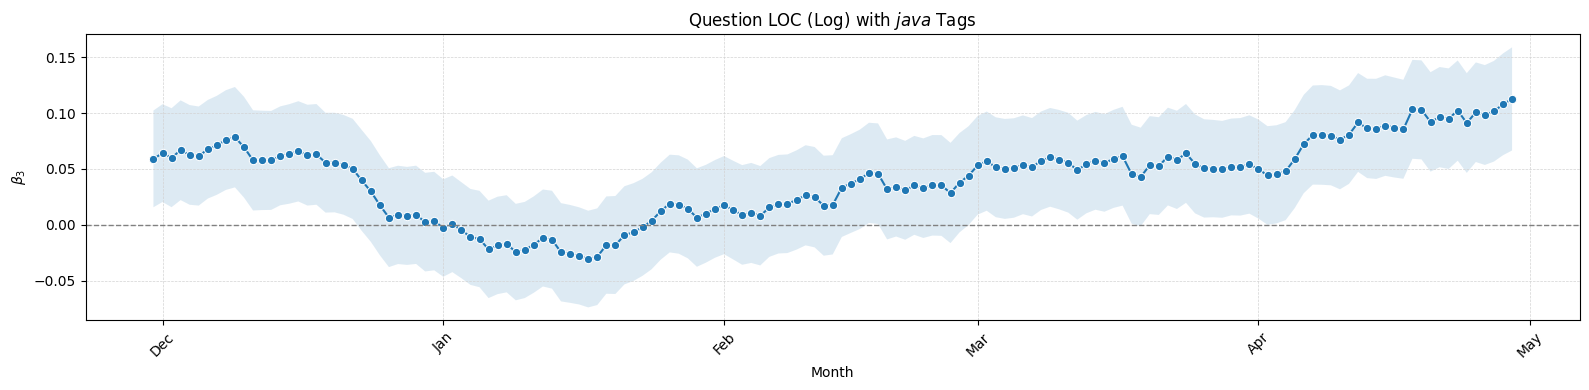

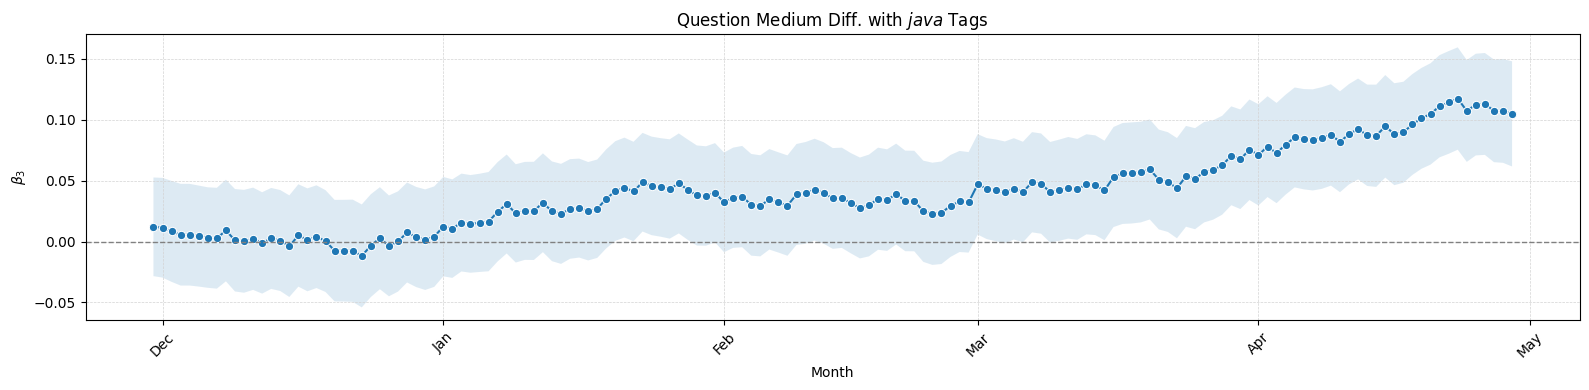

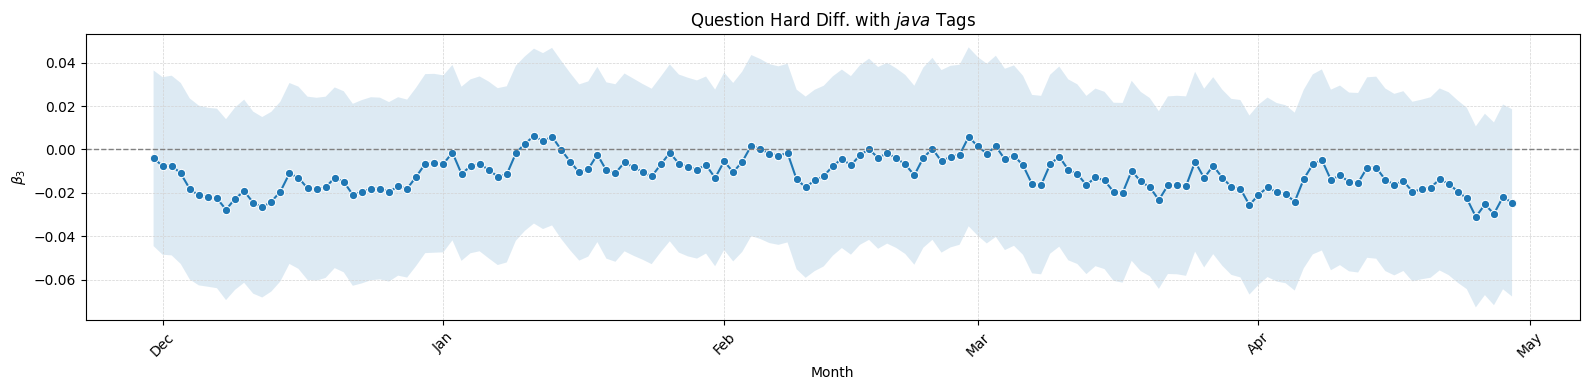

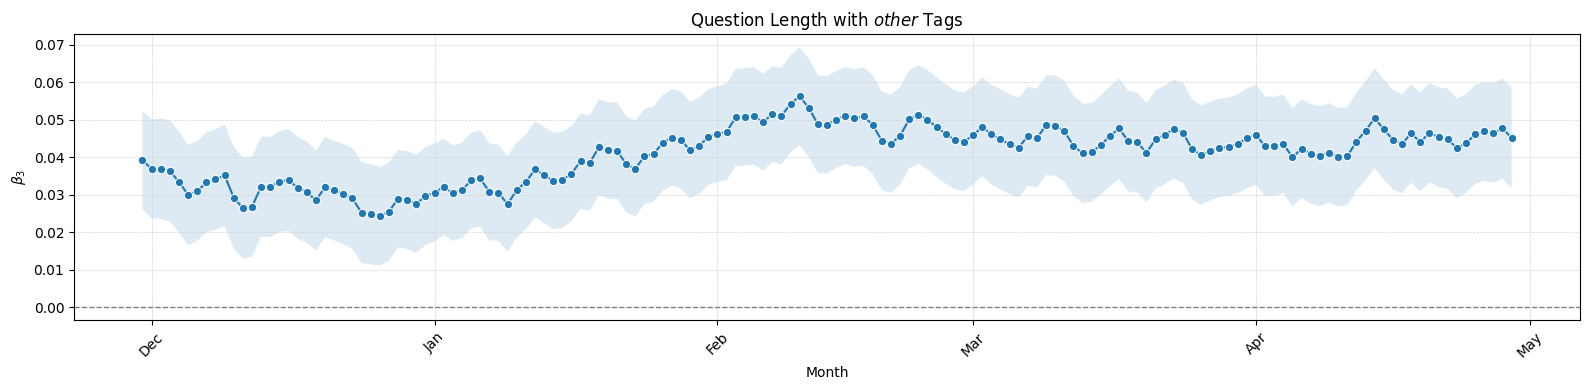

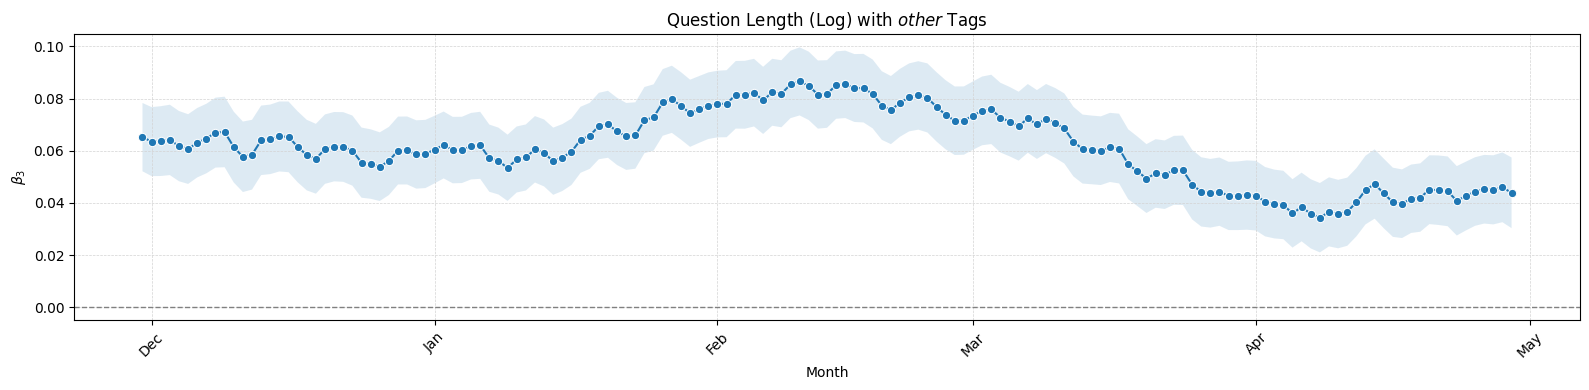

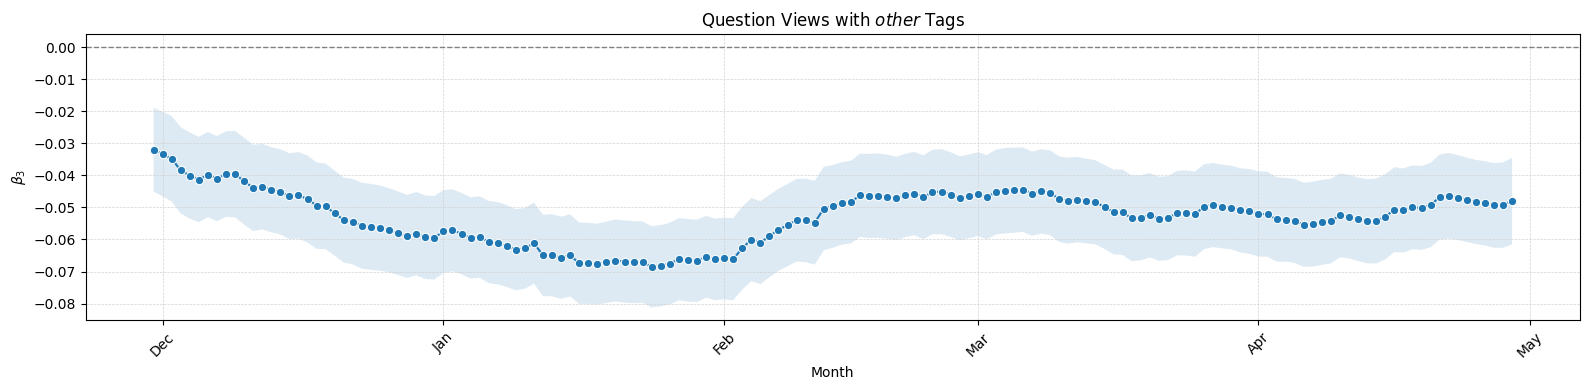

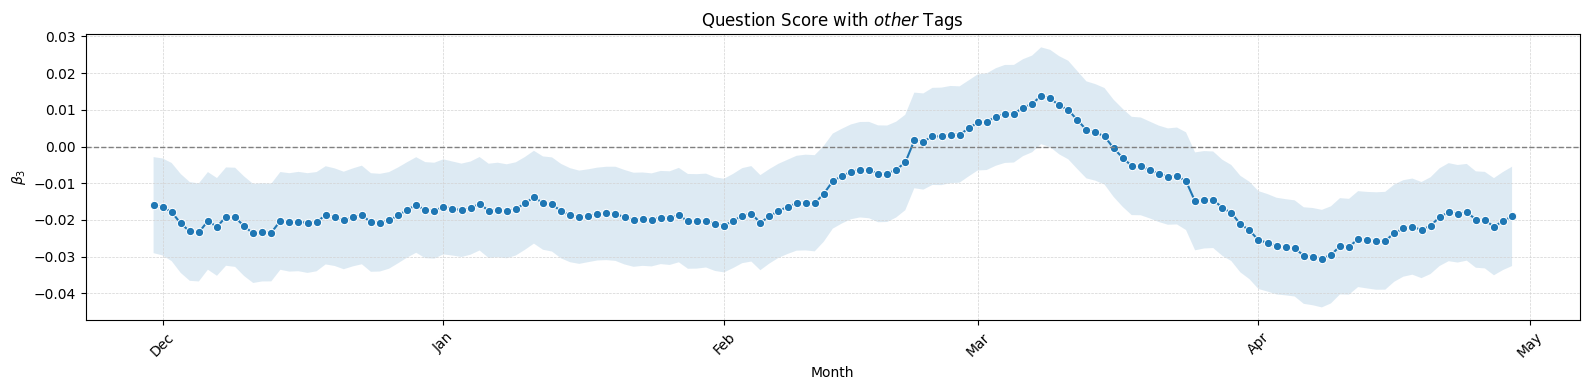

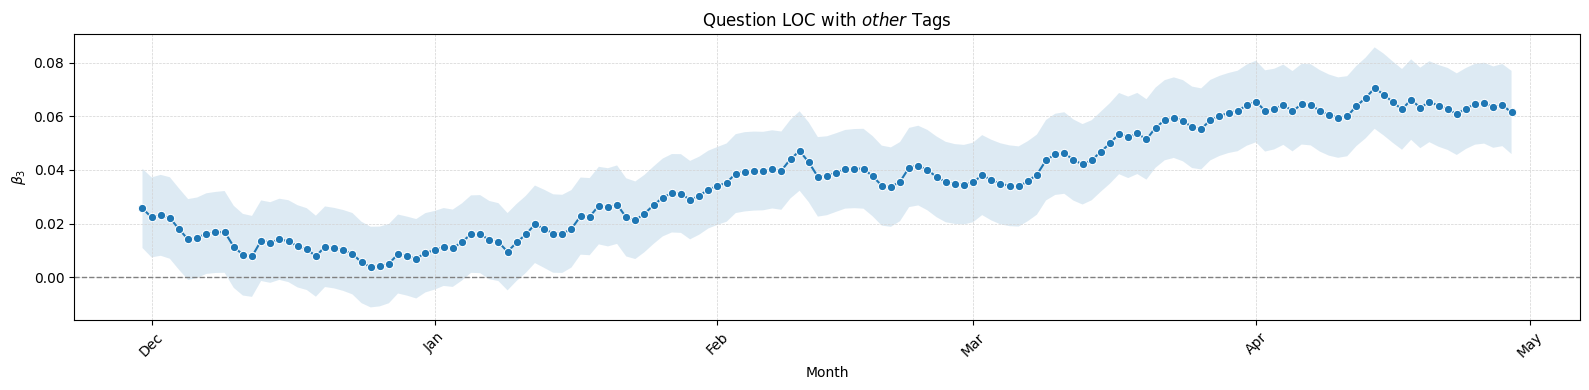

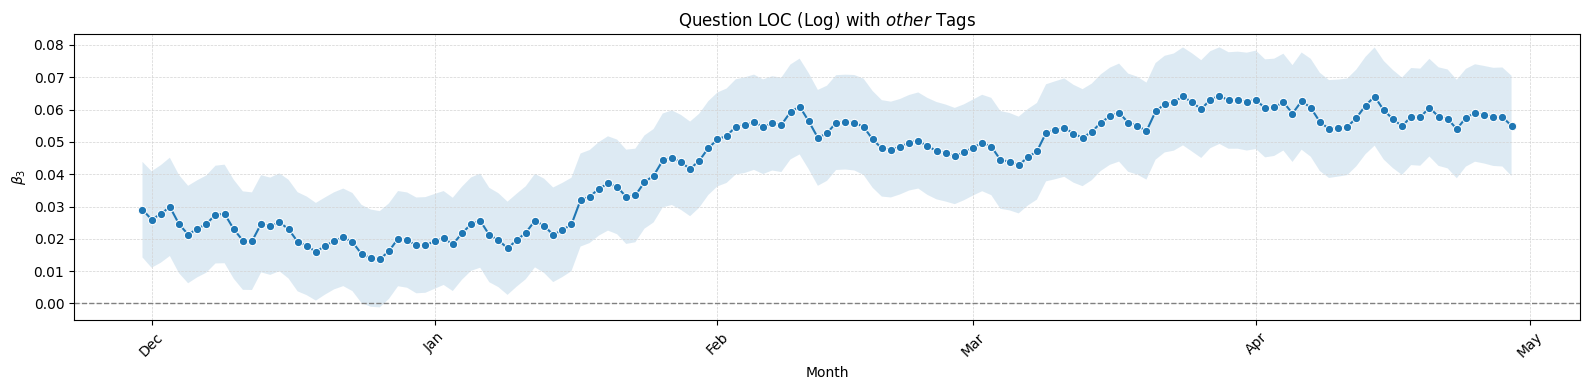

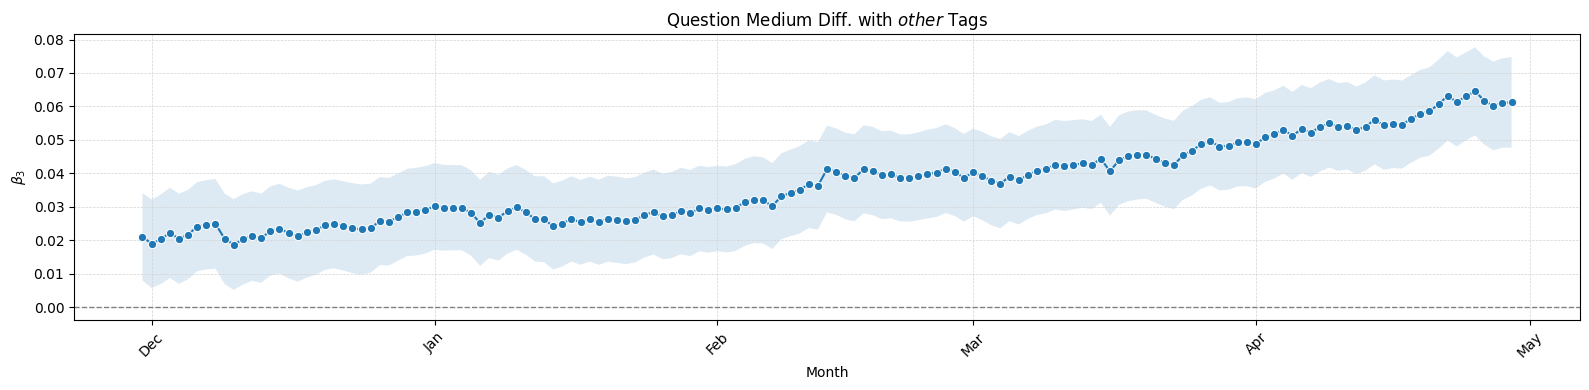

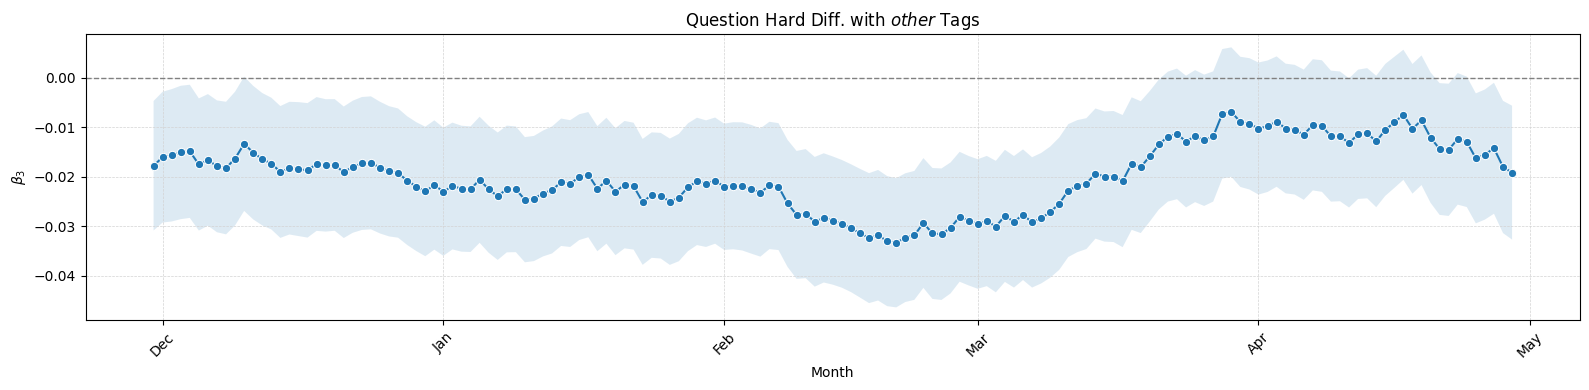

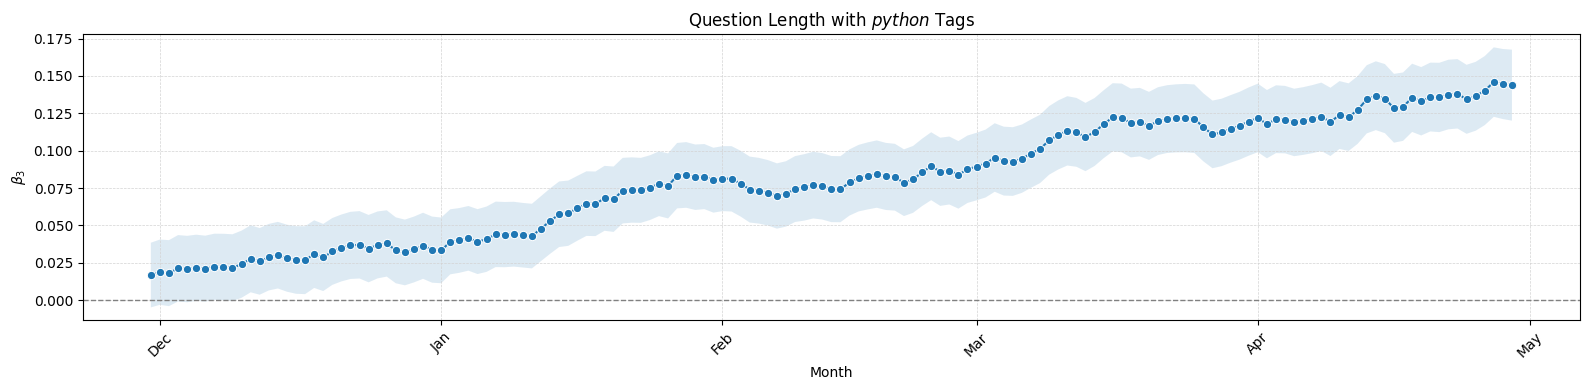

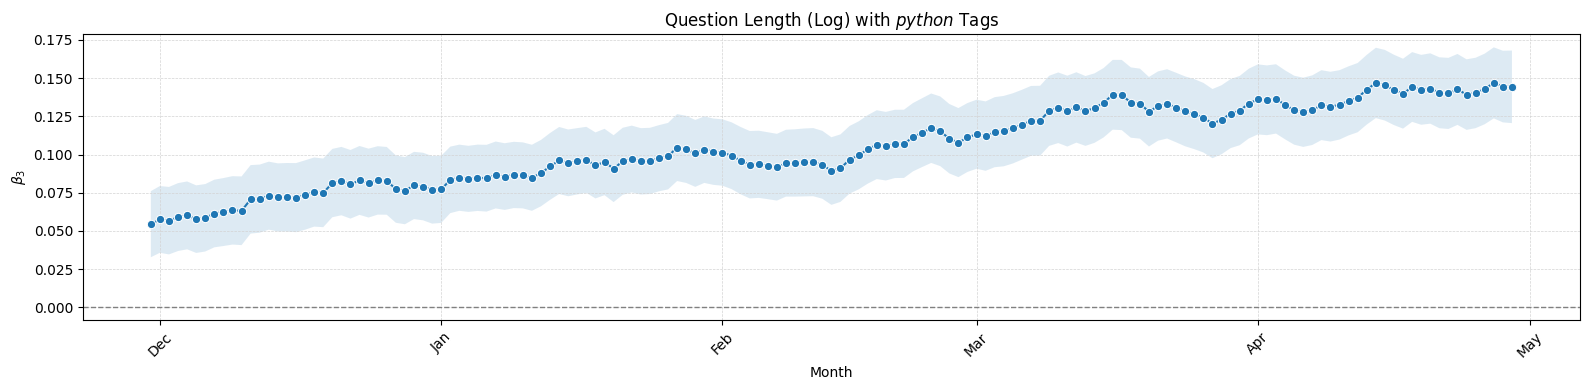

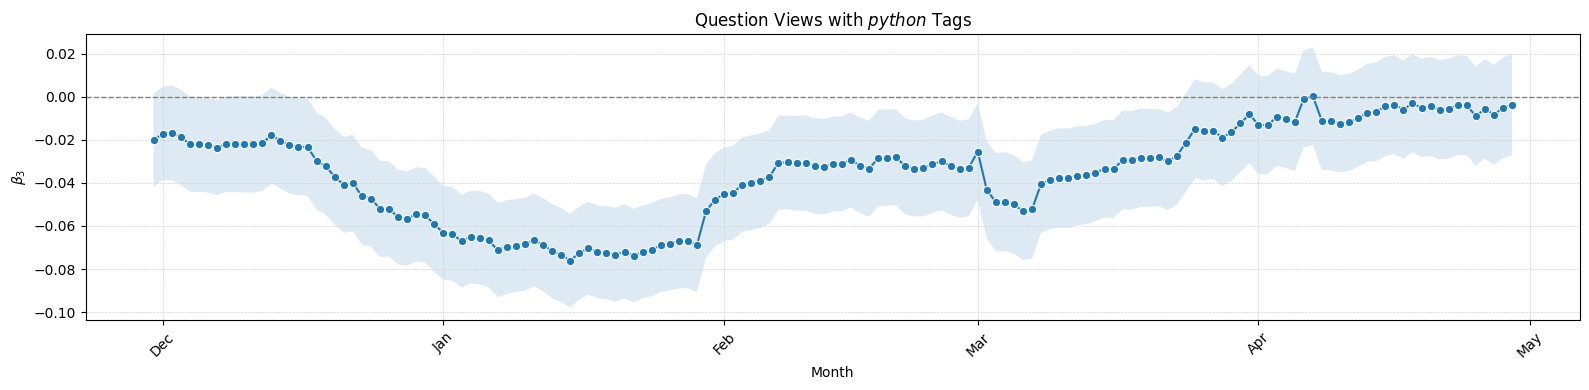

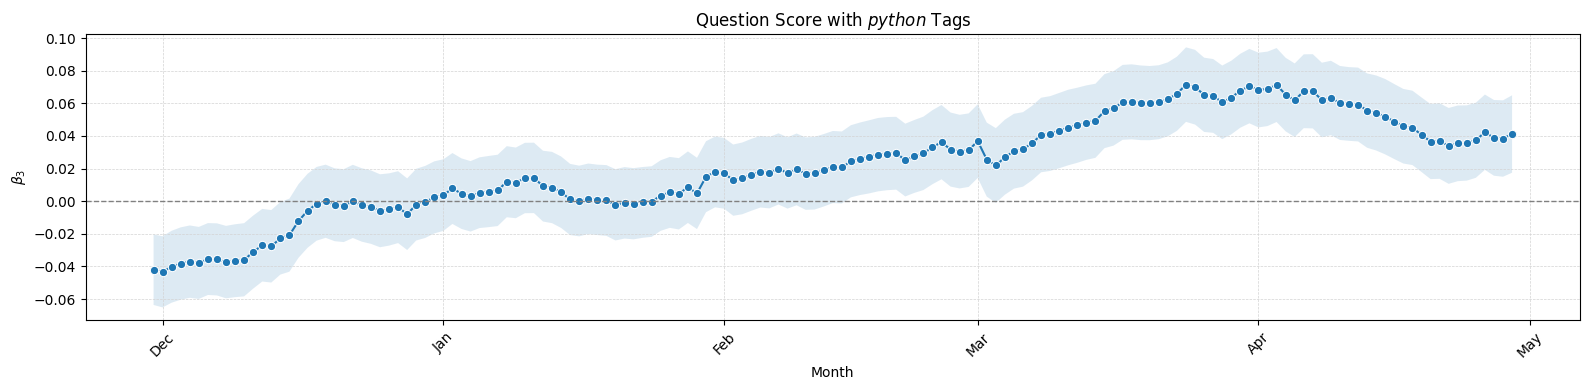

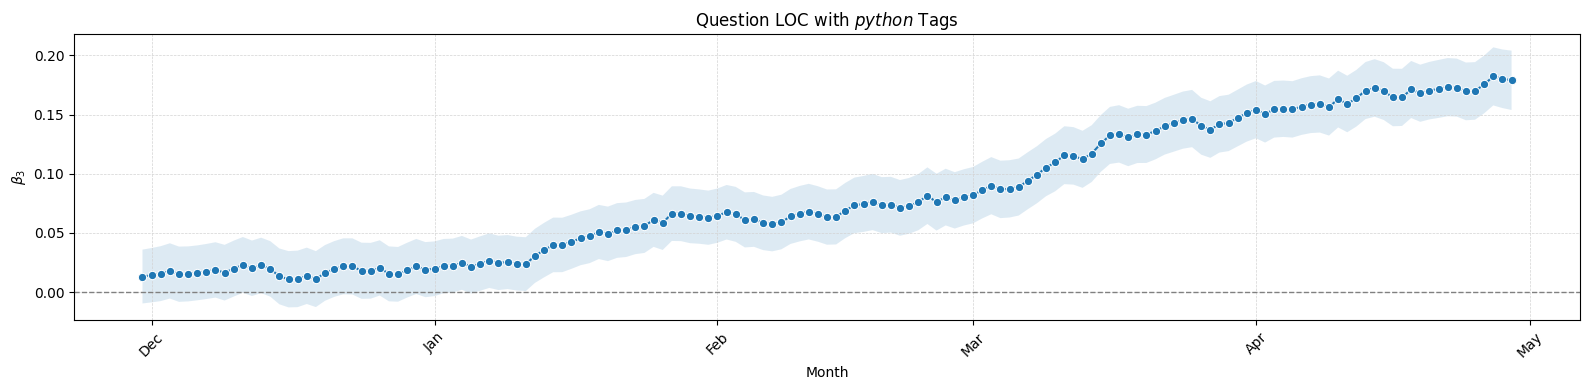

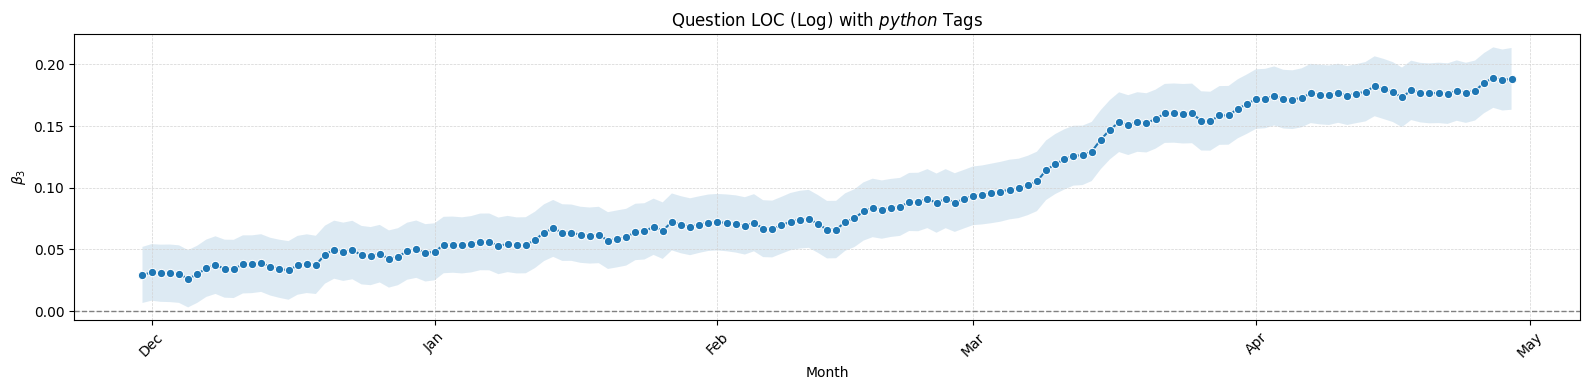

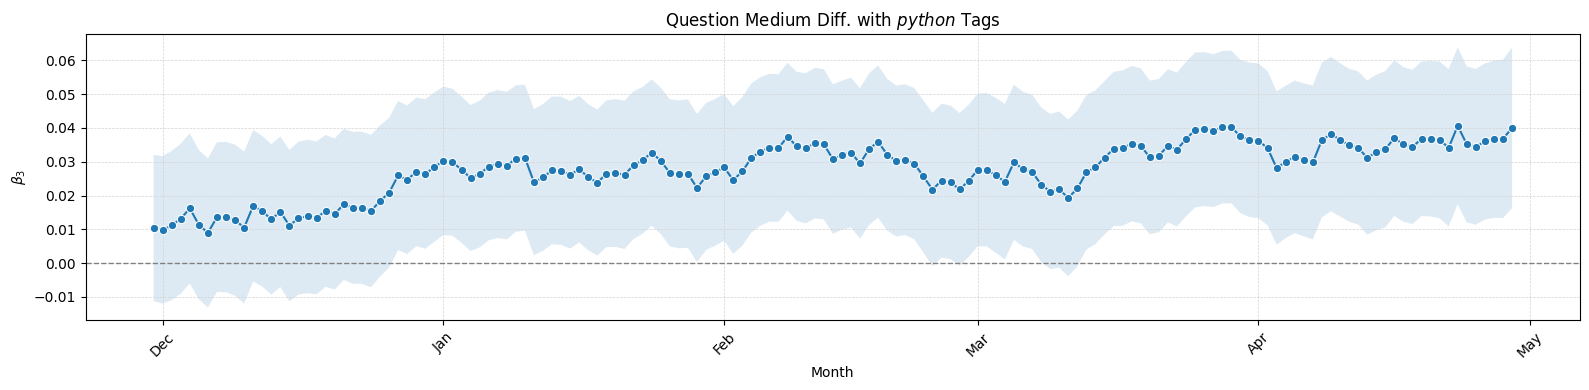

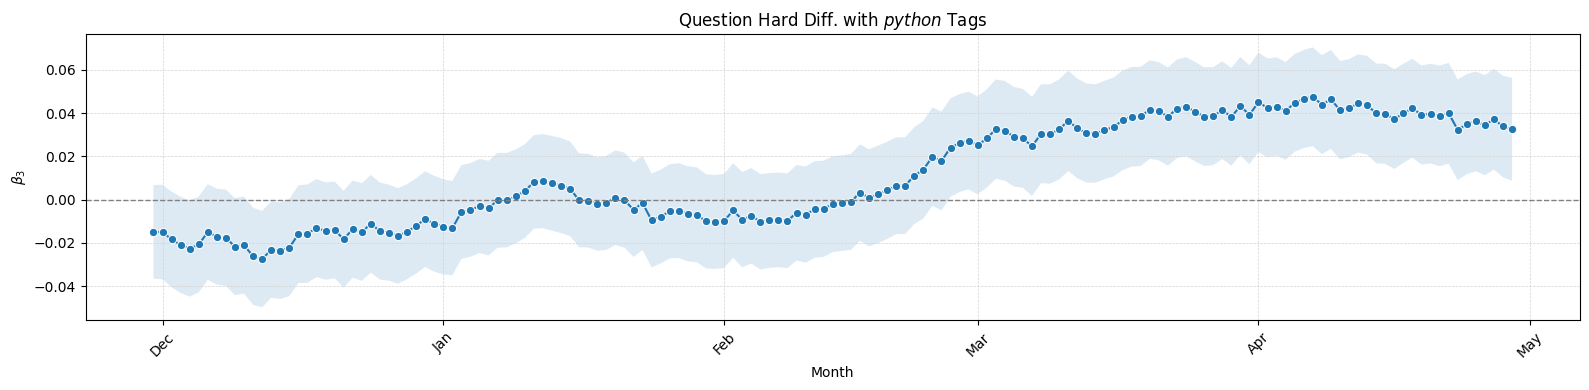

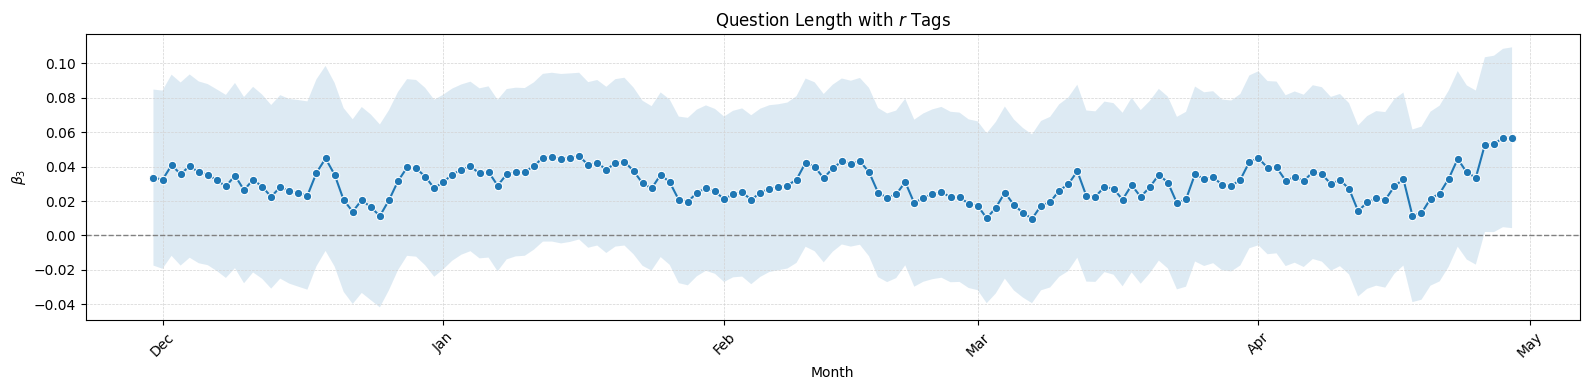

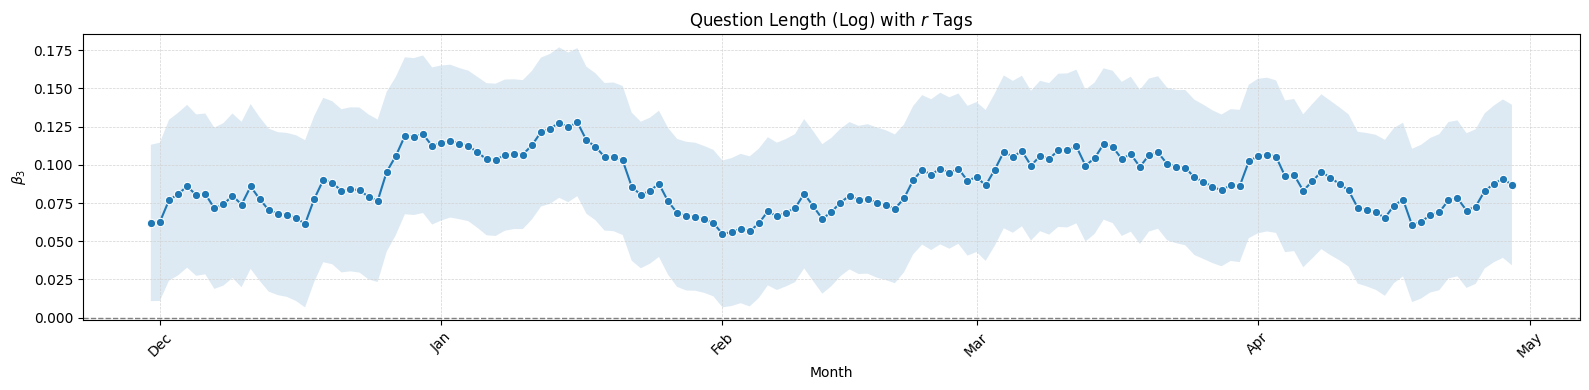

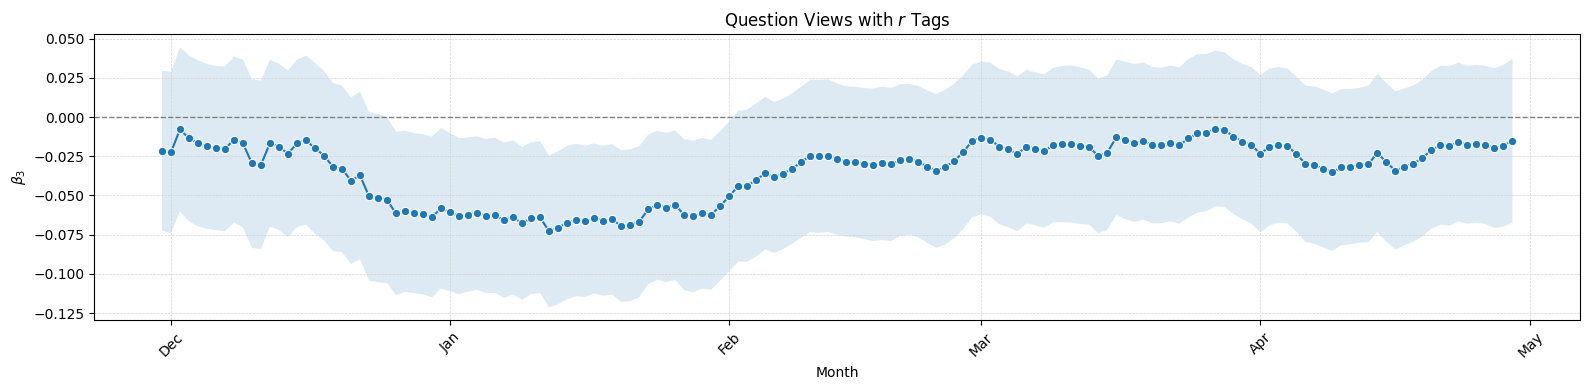

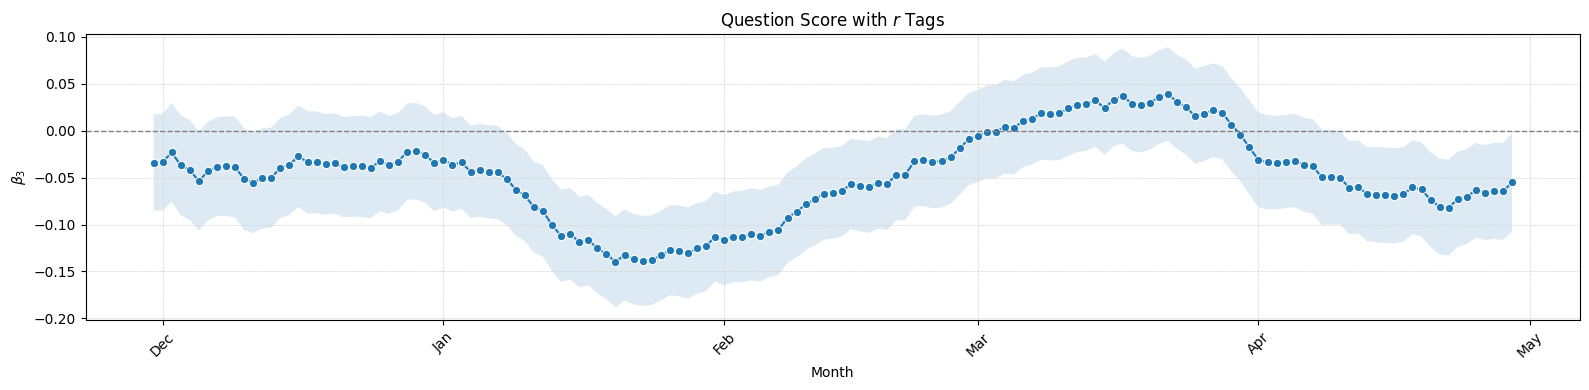

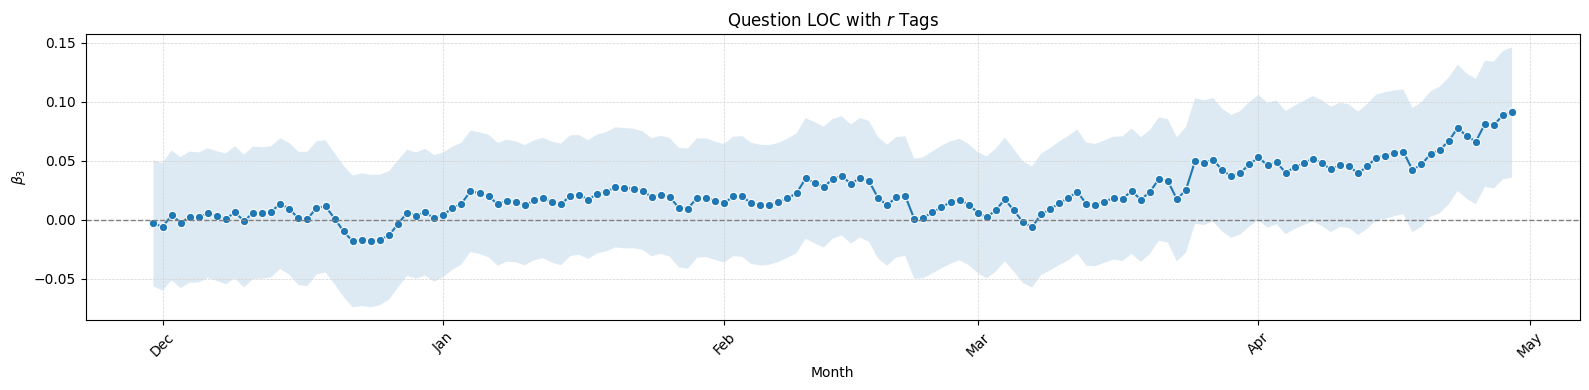

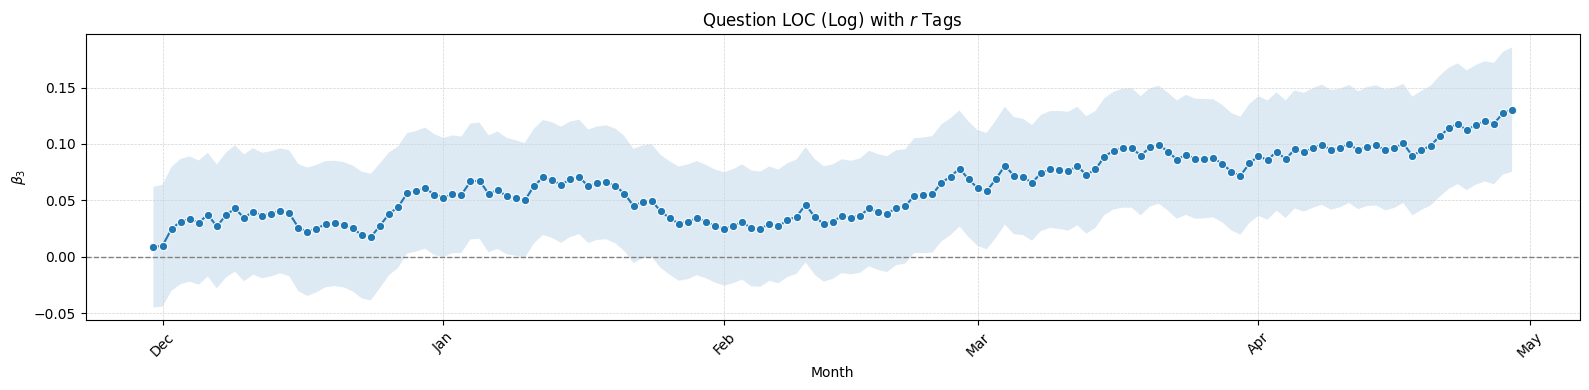

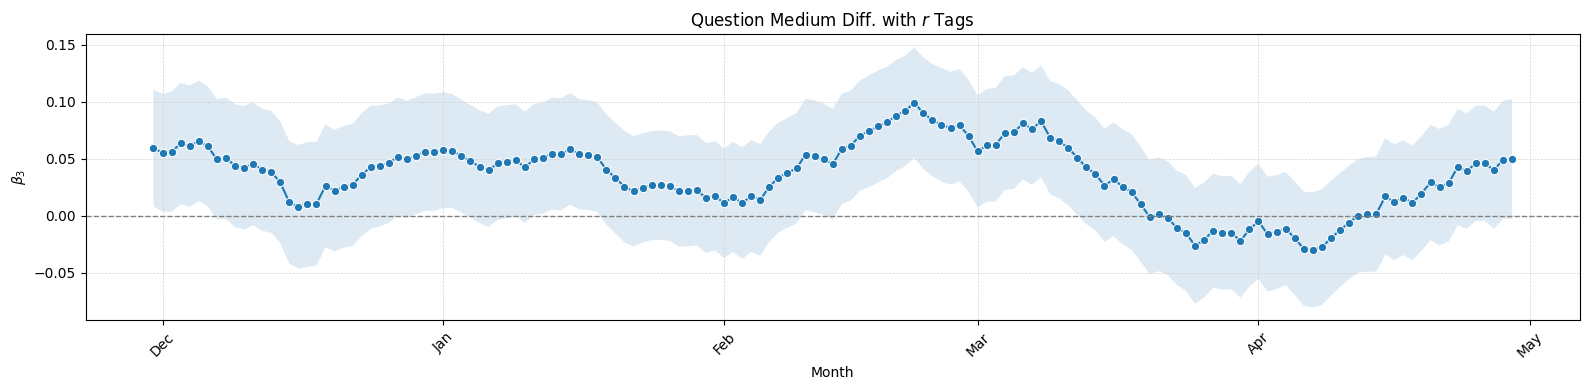

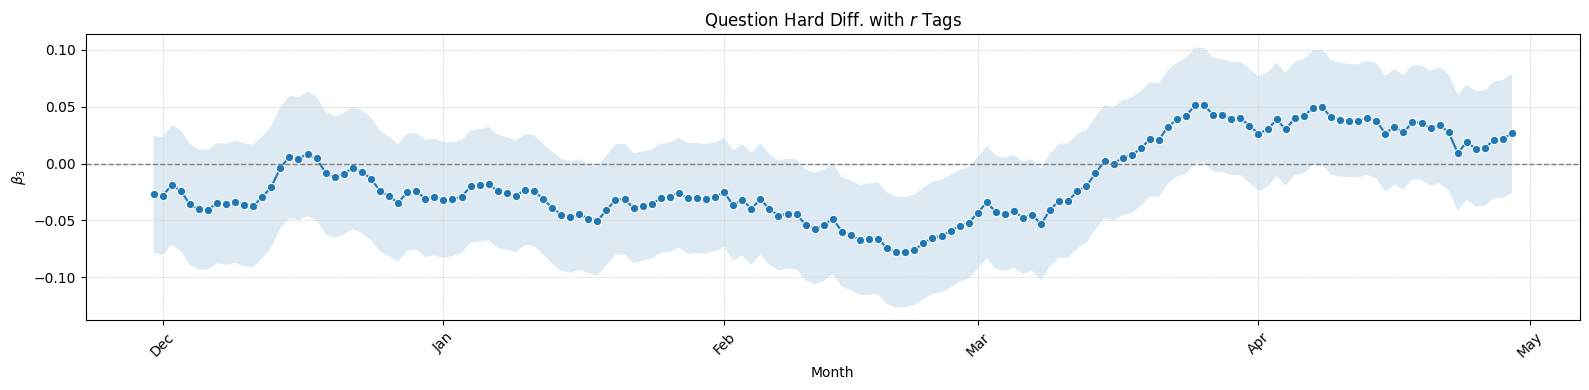

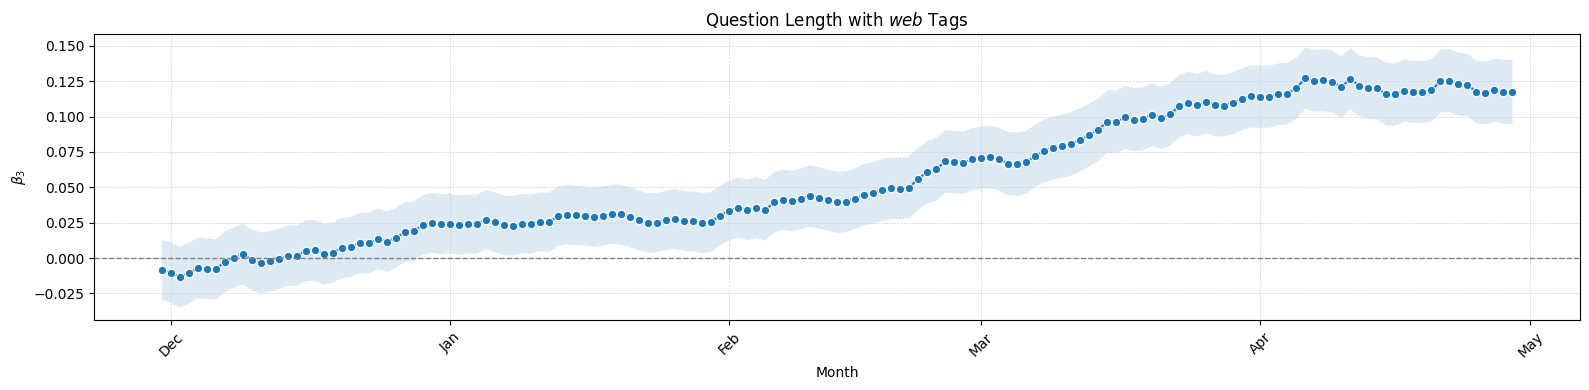

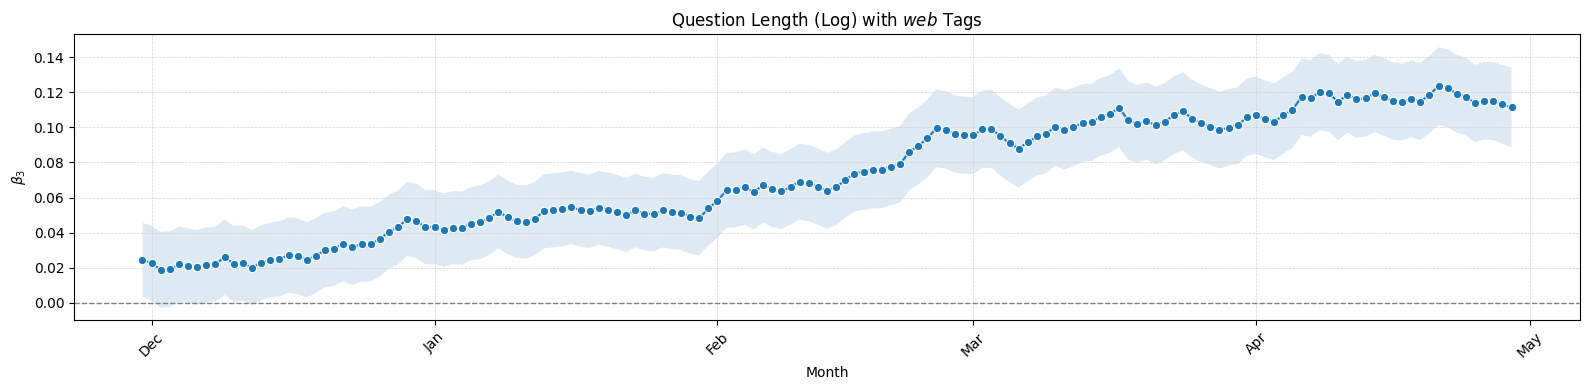

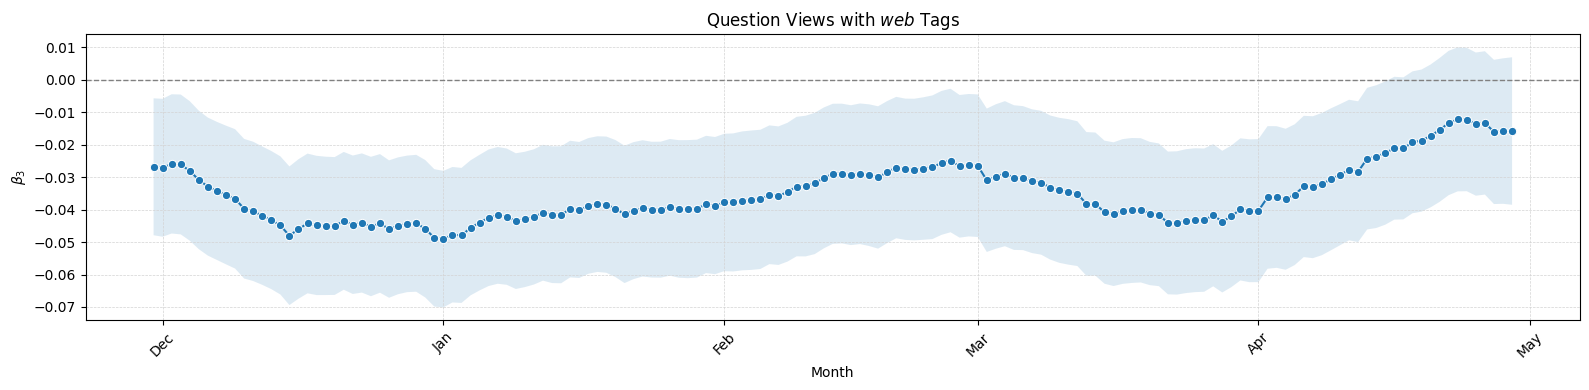

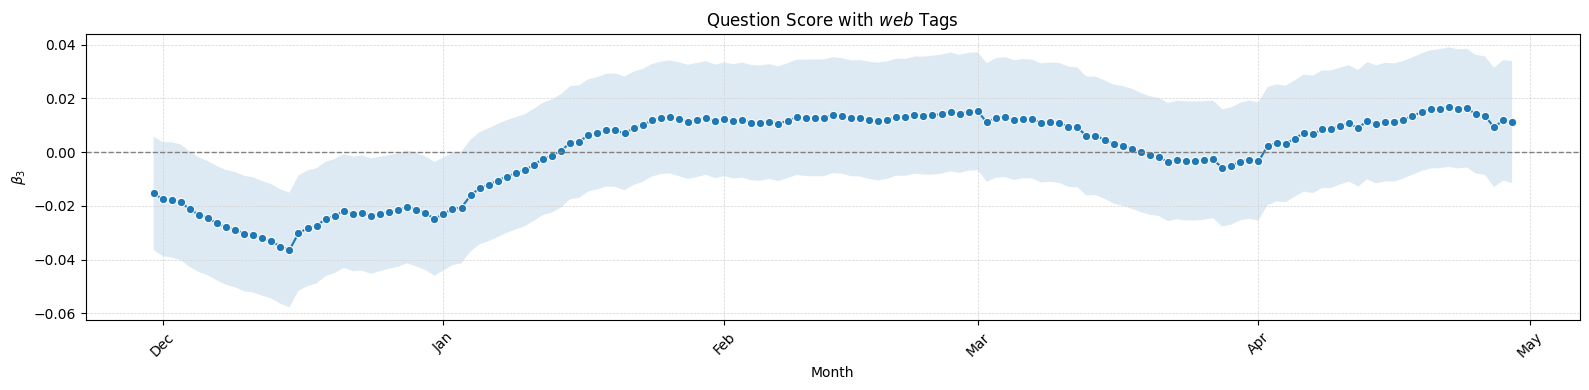

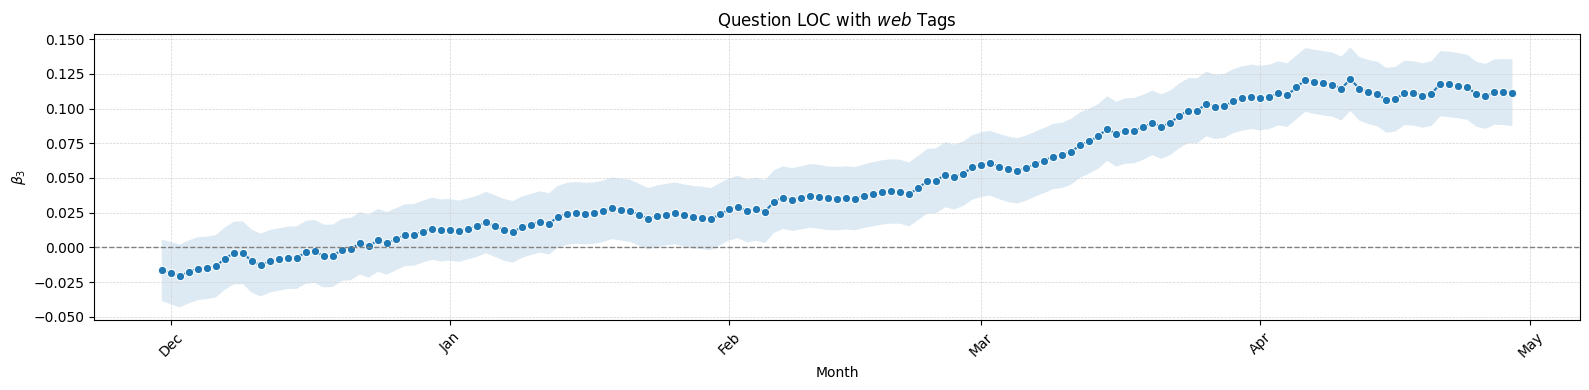

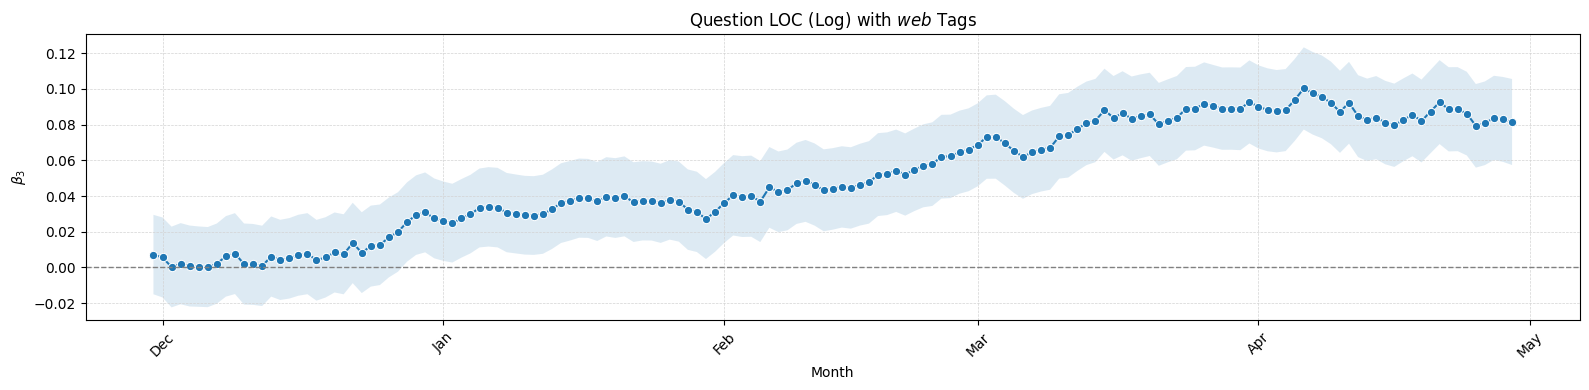

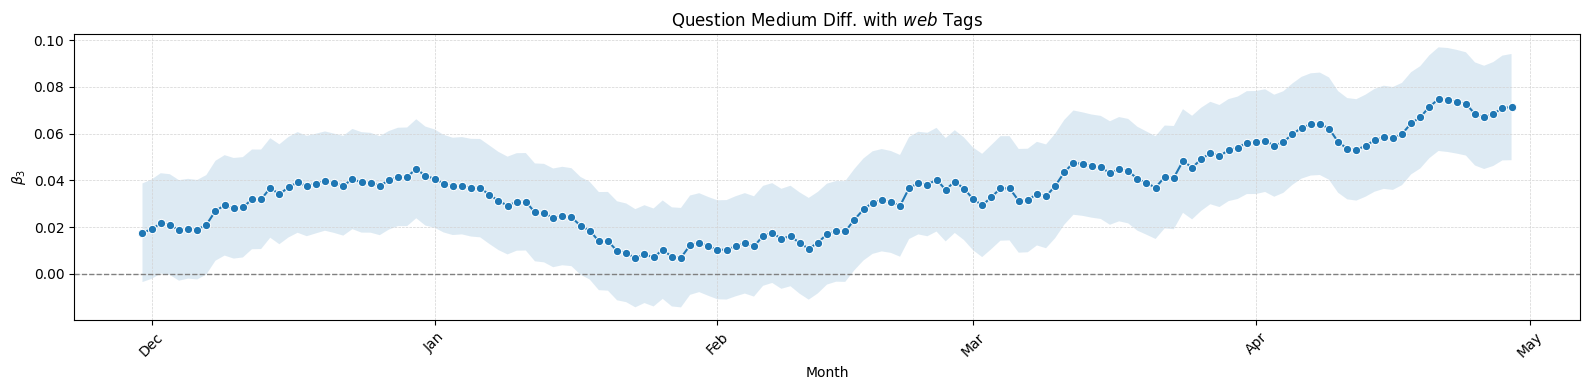

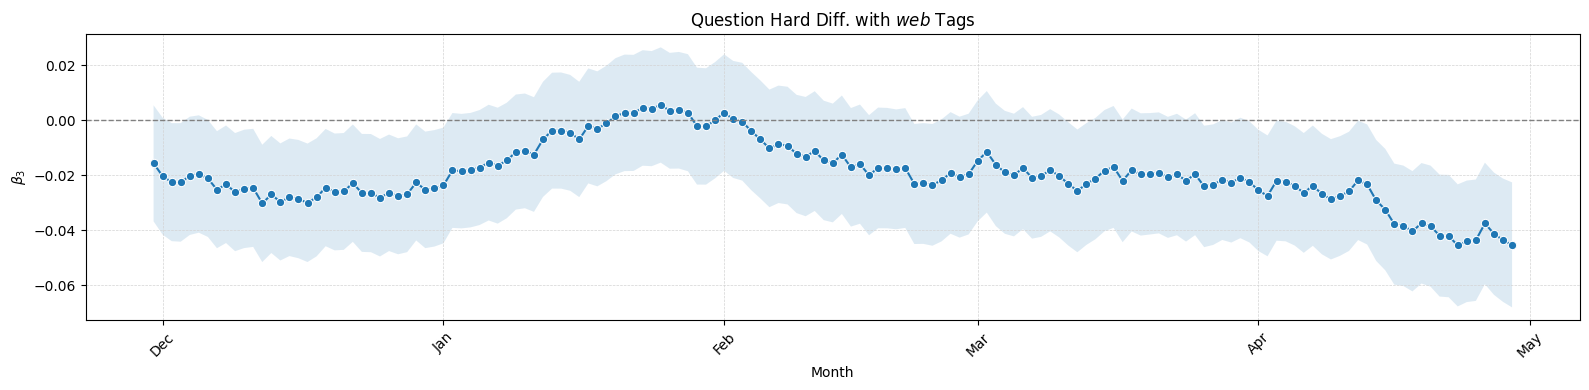

In [12]:
titles = {'line_count': ['Question Length', 'qlc_beta_1.pdf'],
        'log_lc': ['Question Length (Log)', 'qllc_beta_1.pdf'],
        'ViewCount': ['Question Views', 'qv_beta_1.pdf'],
        'Score': ['Question Score', 'qs_beta_1.pdf'],
        'loc': ['Question LOC', 'loc_beta_1.pdf'],
        'log_loc': ['Question LOC (Log)', 'log_loc_beta_1.pdf'],
        'Medium': ['Question Medium Diff.', 'medium_beta_1.pdf'],
        'Hard': ['Question Hard Diff.', 'hard_beta_1.pdf']}

for tag in tags:
    for outcome in outcomes:
        key = (tag, outcome)
        df_res = results[key]
        escaped_tag = tag.replace('#', r'\#')
        so.plot_did(df_res, rf'{titles[outcome][0]} with $\mathit{{{escaped_tag}}}$ Tags', f'tags/groups/{tag}_{titles[outcome][1]}')